<a href="https://colab.research.google.com/github/ady909/-Taxi-trip-time-Prediction/blob/main/Taxi_trip_time_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Description**

Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

##**Data Description**

The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.


##**Data fields**

id - a unique identifier for each trip
vendor_id - a code indicating the provider associated with the trip record
pickup_datetime - date and time when the meter was engaged
dropoff_datetime - date and time when the meter was disengaged
passenger_count - the number of passengers in the vehicle (driver entered value)
pickup_longitude - the longitude where the meter was engaged
pickup_latitude - the latitude where the meter was engaged
dropoff_longitude - the longitude where the meter was disengaged
dropoff_latitude - the latitude where the meter was disengaged
store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
trip_duration - duration of the trip in seconds

In [1]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import datetime

In [2]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.facecolor'] = '#00000000'

In [3]:
#Mounting the Drive inorder to load the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#creating dataframe
nyc_df = pd.read_csv("/content/drive/MyDrive/Datasets/NYC Taxi Data.csv")

##Lets take a look at dataset

In [5]:
#lets look at first few elements
nyc_df.head(n =20)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


In [6]:
#lets look at last few elements
nyc_df.tail(n = 20)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458624,id3482902,1,2016-03-01 07:21:04,2016-03-01 07:23:36,1,-73.974693,40.756088,-73.969971,40.762115,N,152
1458625,id3730733,2,2016-01-25 17:21:15,2016-01-25 17:54:37,1,-73.989655,40.740612,-73.961029,40.765366,N,2002
1458626,id0155863,2,2016-01-17 17:21:11,2016-01-17 17:25:15,2,-73.954071,40.767021,-73.950340,40.778233,N,244
1458627,id0439281,2,2016-06-23 10:10:28,2016-06-23 10:25:08,5,-73.981651,40.767708,-73.959183,40.777412,N,880
1458628,id0986544,2,2016-05-30 03:08:19,2016-05-30 03:14:10,2,-73.988632,40.721378,-73.975548,40.728519,N,351
1458629,id3109086,2,2016-06-24 10:33:51,2016-06-24 10:43:52,1,-73.959618,40.808941,-73.947922,40.830189,N,601
1458630,id0287353,2,2016-06-25 03:44:32,2016-06-25 03:53:41,5,-73.991508,40.727135,-73.988136,40.740932,N,549
1458631,id1724231,1,2016-05-14 23:18:23,2016-05-14 23:24:05,3,-73.958946,40.763725,-73.953156,40.780003,N,342
1458632,id0469946,2,2016-03-06 11:04:48,2016-03-06 11:17:45,2,-74.015572,40.710892,-73.996620,40.743633,N,777
1458633,id2432342,1,2016-03-17 19:10:16,2016-03-17 19:26:35,3,-73.979652,40.735279,-73.995522,40.759754,N,979


In [7]:
#lets check dimensions
nyc_df.shape

(1458644, 11)

Looks like a huge data with 1458644 data points , 10 features and one Target variable i.e. 'trip_duration'

In [8]:
#basic summary
nyc_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


4 columns are object datatype ,4 columns are float datatype and remaing 3 columns are integer datatype.



In [9]:
#five point summary
nyc_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


## Data Pre-processing

Converting the datatype of pickup date time and dropoff date time to datetime datatype

In [10]:
#convertin to datetime datatype
nyc_df['pickup_datetime']= pd.to_datetime(nyc_df['pickup_datetime'])
nyc_df['dropoff_datetime']= pd.to_datetime(nyc_df['dropoff_datetime'])

In [11]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


### Extracting hour , day_name , day , month  and creating new features

In [12]:
#Extracting hour from pickup and dropoff datetime columns
nyc_df['pickup_hour']= nyc_df['pickup_datetime'].dt.hour
nyc_df['dropoff_hour']= nyc_df['dropoff_datetime'].dt.hour

#Extracting day from pickup and dropoff datetime columns
nyc_df['pickup_day']=nyc_df['pickup_datetime'].dt.day_name()
nyc_df['dropoff_day']=nyc_df['dropoff_datetime'].dt.day_name()

#Extracting date from pickup and dropoff datetime columns
nyc_df['pickup_date']=pd.DatetimeIndex(nyc_df['pickup_datetime']).day
nyc_df['dropoff_date']=pd.DatetimeIndex(nyc_df['dropoff_datetime']).day

#Extracting month from pickup and dropoff datetime columns
nyc_df['pickup_month']= nyc_df['pickup_datetime'].dt.month
nyc_df['dropoff_month']=nyc_df['dropoff_datetime'].dt.month

#Extracting weekday from pickup and dropoff datetime columns
nyc_df['pickup_weekday']=nyc_df['pickup_datetime'].dt.weekday
nyc_df['dropoff_weekday']=nyc_df['dropoff_datetime'].dt.weekday

pickup_day and dropoff_day which will contain the name of the day on which the ride was taken.

pickup_weekday and dropoff_weekday which will contain the day number instead of characters with Monday=0 and Sunday=6.

pickup_hour and dropoff_hour with an hour of the day in the 24-hour format.

pickup_date and dropoff_date will provide the date of the trip.

pickup_month and dropoff_month with month number with January=1 and December=12. Next, I have

###time_zone as a New feature is created

Defined a function that lets us determine what time of the day the ride was taken. I have created 4 time zones ‘Morning’ (from 6:00 am to 11:59 pm), ‘Afternoon’ (from 12 noon to 3:59 pm), ‘Evening’ (from 4:00 pm to 9:59 pm), and ‘Late Night’ (from 10:00 pm to 5:59 am)

In [13]:
#custom function
def time_zone(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [14]:
nyc_df['pickup_timezone']= nyc_df['pickup_hour'].apply(time_zone)
nyc_df['dropoff_timezone']= nyc_df['dropoff_hour'].apply(time_zone)

### Lets create distance as a new feature

We also saw during dataset exploration that we have coordinates in the form of longitude and latitude for pickup and dropoff. But, we can’t really gather any insights or draw conclusions from that. So, the most obvious feature that we can extract from this is distance. Let us do that.

Importing the library which lets us calculate distance from geographical coordinates

Importing the library which lets us calculate distance from geographical coordinates

In [15]:
from geopy.distance import great_circle

In [16]:
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):

 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)

 return great_circle(start_coordinates,stop_coordinates).km

In [17]:
nyc_df['distance'] = nyc_df.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)


## trip direction feature is created

It was observed, especially for the airport trips, that the direction of the trip also has some effect on the trip duration.

Let's add the bearing of each trip which simply means the overall direction in which the taxi travelled from the pickup point to the dropoff point.

The convention followed here is such the North is denoted as 0 degrees, East as 90 degrees, South as 180 degrees and circle back to North as 360 degrees.

In [18]:
import math
def get_bearing(lat1, long1, lat2, long2):
    dLon = (long2 - long1)
    x = math.cos(math.radians(lat2)) * math.sin(math.radians(dLon))
    y = math.cos(math.radians(lat1)) * math.sin(math.radians(lat2)) - math.sin(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.cos(math.radians(dLon))
    brng = np.arctan2(x,y)
    brng = np.degrees(brng)
    if brng < 0:
      brng = 360 + brng
      return brng
    else:
      return brng

In [20]:
nyc_df['trip_direction'] = nyc_df.apply(lambda x: get_bearing(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],
                       x['dropoff_longitude']), axis = 1)

###trip_speed as a new feature

In [21]:
nyc_df['time_diff_minutes']= nyc_df['dropoff_datetime']- nyc_df['pickup_datetime']
nyc_df['time_diff_minutes']= nyc_df['time_diff_minutes']/np.timedelta64(1,'m')

In [22]:
#The trip_speed unit will be mph
def speed(x,y):
  z = (x*0.621)/(y*0.016667)
  return z

In [23]:
nyc_df['trip_speed']= nyc_df.apply(lambda x: speed(x['distance'],x['time_diff_minutes']),axis=1)

Lets first check our data now

In [24]:
nyc_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_month,dropoff_month,pickup_weekday,dropoff_weekday,pickup_timezone,dropoff_timezone,distance,trip_direction,time_diff_minutes,trip_speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,3,3,0,0,Evening,Evening,1.498523,99.970196,7.583333,7.362705
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,6,6,6,Late night,Late night,1.805510,242.846232,11.050000,6.087959
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1,1,1,1,Morning,Afternoon,6.385108,200.319835,35.400000,6.720462
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4,4,2,2,Evening,Evening,1.485501,187.262300,7.150000,7.741069
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,3,3,5,5,Afternoon,Afternoon,1.188590,179.473585,7.250000,6.108411


In [25]:
nyc_df.shape

(1458644, 27)

After feature creation we have total 26 features and 1 target variable

## Data Cleaning

Check wheather null values are present or not

In [26]:
#Checking Missing Values
nyc_df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_hour           0
dropoff_hour          0
pickup_day            0
dropoff_day           0
pickup_date           0
dropoff_date          0
pickup_month          0
dropoff_month         0
pickup_weekday        0
dropoff_weekday       0
pickup_timezone       0
dropoff_timezone      0
distance              0
trip_direction        0
time_diff_minutes     0
trip_speed            0
dtype: int64

There are no null / nan values in data

lets check duplicates

In [27]:
#Checking Duplicated Rows
nyc_df.duplicated().sum()

0

## **So there are no null and duplicate values in our data.**

### **Handling Outliers**

The pickup latitudes and longitudes should be within the NYC boundary defined as pickup latitude/longitude < 1th percentile value of the pickup latitude/longitude and pickup latitude/longitude > 99.8th percentile value of the trip duration


tripduration < 1th percentile value of the trip duration and trip_duration > 99.8th percentile value of the trip duration


distance between the pickup and dropoff points is > its 1th percentile value and < its 99.8th percentile value.


trip_speed between the pickup and dropoff points is > its 1th percentile value and < its 99.8th percentile value.


Removing Outliers from Pickup_latitude

Over here we will be take to consideration data records which lies between 99% and 1% range and consider records outside this range as outliers .Hence we will drop records which are outside the range from the dataset

In [29]:
percentile_speed = [1, 25, 50, 75, 95, 99, 99.8]
print("Total number of trips = {:,}".format(len(nyc_df)))
for i in percentile_speed:
    print("{}% of the latitude were below {:.2f} degree".format(i, np.percentile(nyc_df.pickup_latitude, i)))

Total number of trips = 1,458,644
1% of the latitude were below 40.64 degree
25% of the latitude were below 40.74 degree
50% of the latitude were below 40.75 degree
75% of the latitude were below 40.77 degree
95% of the latitude were below 40.79 degree
99% of the latitude were below 40.81 degree
99.8% of the latitude were below 40.83 degree


In [31]:
nyc_df = nyc_df[nyc_df['pickup_latitude'] <=np.percentile(nyc_df.pickup_latitude,99.8) ] #filtering records
nyc_df = nyc_df[nyc_df['pickup_latitude']>=np.percentile(nyc_df.pickup_latitude,1) ]

lets remove outliers from pickup_longitude and pickup latitude

In [34]:
percentile_speed = [1, 25, 50, 75, 95, 99, 99.8]
print("Total number of trips = {:,}".format(len(nyc_df)))
for i in percentile_speed:
    print("{}% of the longitude were below {:.2f} degree".format(i, np.percentile(nyc_df.pickup_longitude, i)))

Total number of trips = 1,441,261
1% of the longitude were below -74.01 degree
25% of the longitude were below -73.99 degree
50% of the longitude were below -73.98 degree
75% of the longitude were below -73.97 degree
95% of the longitude were below -73.94 degree
99% of the longitude were below -73.79 degree
99.8% of the longitude were below -73.78 degree


In [35]:
nyc_df = nyc_df[nyc_df['pickup_longitude'] <=np.percentile(nyc_df.pickup_longitude,99.8) ] #filtering records
nyc_df = nyc_df[nyc_df['pickup_longitude']>=np.percentile(nyc_df.pickup_longitude,1) ]

lets remove Outliers from trip_duration

In [36]:
percentile_trip_duration = [1, 25, 50, 75, 95, 99, 99.8]
print("Total number of trips = {:,}".format(len(nyc_df)))
for i in percentile_trip_duration:
    print("{}% of the trips were below {:.2f} seconds".format(i, np.percentile(nyc_df.trip_duration, i)))

Total number of trips = 1,424,181
1% of the trips were below 90.00 seconds
25% of the trips were below 394.00 seconds
50% of the trips were below 655.00 seconds
75% of the trips were below 1056.00 seconds
95% of the trips were below 2018.00 seconds
99% of the trips were below 3264.00 seconds
99.8% of the trips were below 5358.00 seconds


In [37]:
nyc_df = nyc_df[nyc_df['trip_duration'] <= np.percentile(nyc_df.trip_duration,99.8)] #filtering records
nyc_df = nyc_df[nyc_df['trip_duration'] >=np.percentile(nyc_df.trip_duration,1) ]

Lets remove Outliers from trip_speed

In [38]:
percentile_trip_duration = [1, 25, 50, 75, 95, 99, 99.8]
print("Total number of trips = {:,}".format(len(nyc_df)))
for i in percentile_trip_duration:
    print("{}% of the speed were below {:.2f} mph".format(i, np.percentile(nyc_df.trip_speed, i)))

Total number of trips = 1,407,301
1% of the speed were below 1.64 mph
25% of the speed were below 5.66 mph
50% of the speed were below 7.89 mph
75% of the speed were below 10.92 mph
95% of the speed were below 17.74 mph
99% of the speed were below 24.61 mph
99.8% of the speed were below 30.19 mph


In [39]:
nyc_df = nyc_df[nyc_df['trip_speed'] <= np.percentile(nyc_df.trip_speed,99.8)] #filtering records
nyc_df = nyc_df[nyc_df['trip_speed'] >= np.percentile(nyc_df.trip_speed,1)]

Lets remove  Outliers from distance

In [40]:
percentile_trip_duration = [1, 25, 50, 75, 95, 99, 99.8]
print("Total number of trips = {:,}".format(len(nyc_df)))
for i in percentile_trip_duration:
    print("{}% of the distance were below {:.2f} km".format(i, np.percentile(nyc_df.distance, i)))

Total number of trips = 1,390,441
1% of the distance were below 0.42 km
25% of the distance were below 1.26 km
50% of the distance were below 2.10 km
75% of the distance were below 3.79 km
95% of the distance were below 10.07 km
99% of the distance were below 20.17 km
99.8% of the distance were below 22.10 km


In [41]:
nyc_df = nyc_df[nyc_df['distance'] <= np.percentile(nyc_df.distance,99.8)] #filtering records
nyc_df = nyc_df[nyc_df['distance'] >= np.percentile(nyc_df.distance,1)]

Now lets check dimensions


In [42]:
nyc_df.shape

(1373783, 27)

Intially we had 1,458,644 records and after data cleaning by removing outliers we finally left with 1,373,783 records and added few additional features. Nearly 84,861 records were irrelavent to our problem statement and after data cleaning now we can start with our exploratory data analysis part .

##**Exploratory Data Analysis**

## Univariate Analysis

**Passenger Count**

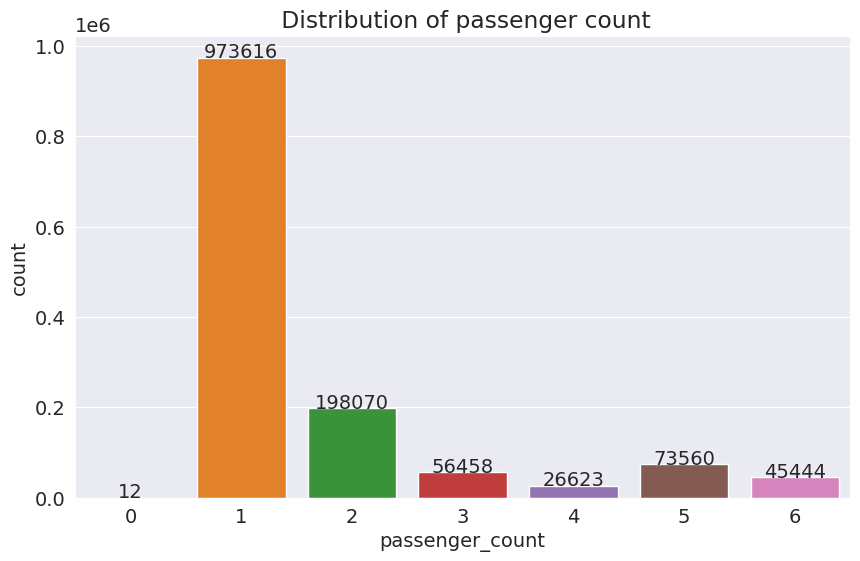

In [44]:
ax = sns.countplot(x = nyc_df['passenger_count'])
plt.title(' Distribution of passenger count')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + (p.get_width()/2),
    y = height+0.2, ha = 'center', s = '{:.0f}'.format(height))
plt.show()

In [45]:
nyc_df=nyc_df[nyc_df['passenger_count']!=0]  #remove the rows which have 0 or 7 or 9 passenger count.
nyc_df=nyc_df[nyc_df['passenger_count']<=6]

**Observation :**
* Mostly Passenger count of taxi is one.
* Solo explorers use taxi for their trip perticular in New York

**pickup/dropoff day**

Text(0.5, 1.0, ' Number of dropoffs done on each day of the week')

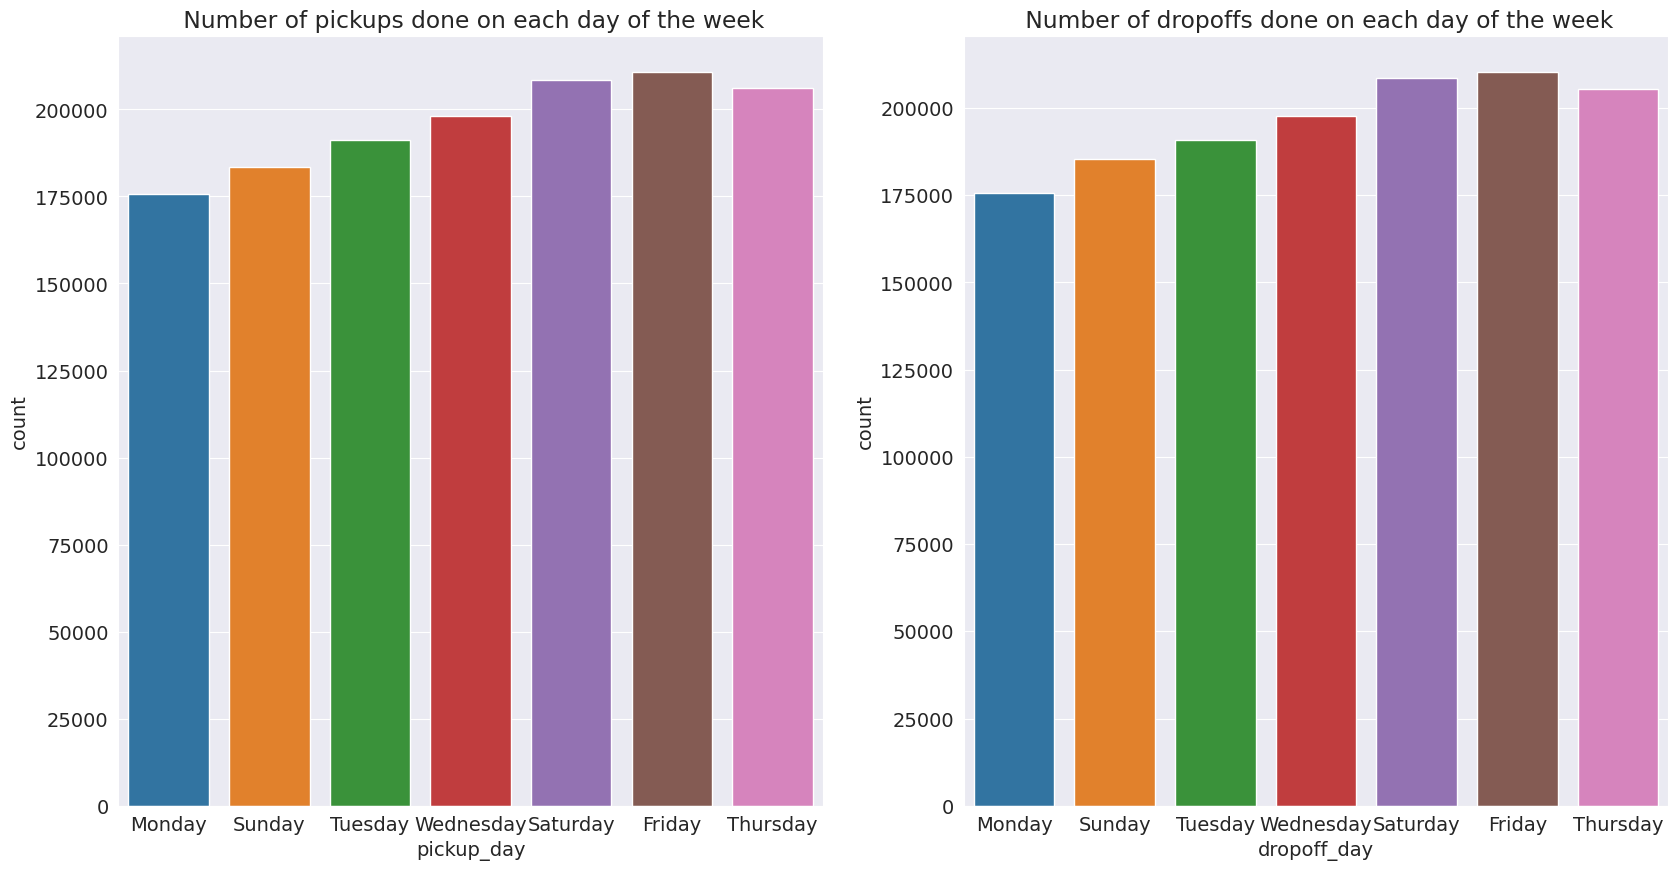

In [48]:
figure, ax = plt.subplots(nrows = 1, ncols=2, figsize = (20,10))
sns.countplot(x = 'pickup_day', data = nyc_df, ax = ax[0])
ax[0].set_title(' Number of pickups done on each day of the week')

sns.countplot(x = 'dropoff_day', data = nyc_df, ax = ax[1])
ax[1].set_title(' Number of dropoffs done on each day of the week')

**Observation**:
* Demand of taxi is the highest on Fridays and is the lowest on Monday.
* People mostly use Taxi on Friday to to go somewhere and enjoy their weekends.

**Pickup Timezone**

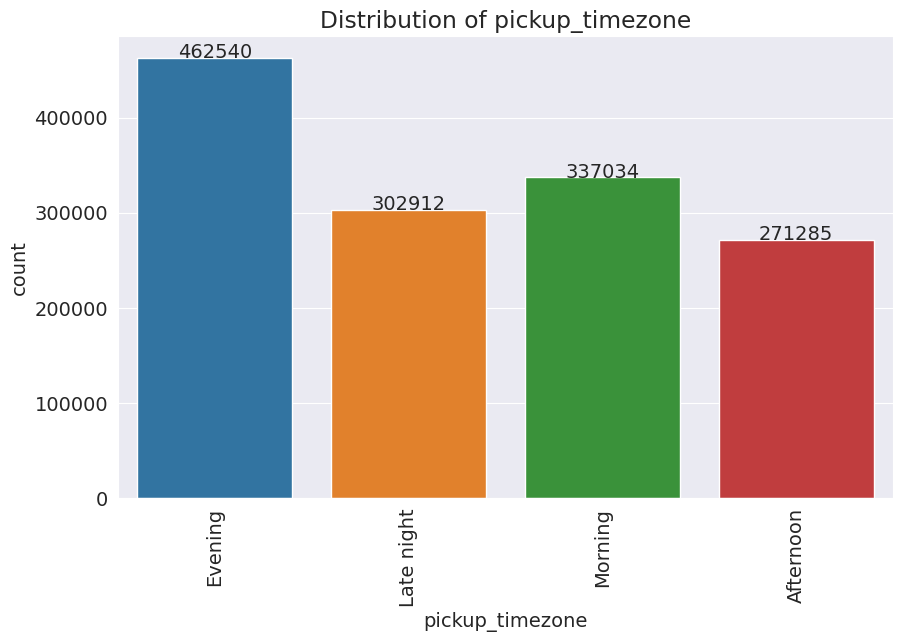

In [49]:
ax = sns.countplot(x=nyc_df['pickup_timezone']);
plt.title('Distribution of pickup_timezone')
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2),
    y = height+0.2, ha = 'center',s = '{:.0f}'.format(height))

plt.xticks(rotation = 'vertical')
plt.show()

**Observation:**
* Mostly people travel with taxi in the evening because they are mostly tired of their work and long distance office traveling. Also their can be safety issue as well because taxies are safer than any other vehicle.

* People travel least during afternoon because of their busy schedule may be.

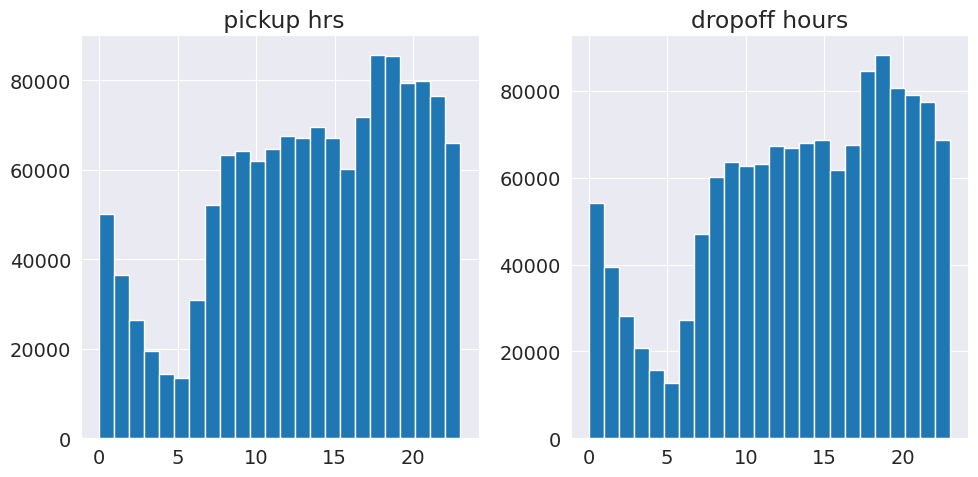

In [50]:
figure, ax = plt.subplots(nrows = 1, ncols=2, figsize = (10,5))


nyc_df.pickup_hour.hist(bins = 24, ax = ax[0])
ax[0].set_title(' pickup hrs')


nyc_df.dropoff_hour.hist(bins = 24, ax = ax[1])
ax[1].set_title('dropoff hours')



plt.tight_layout()

In [51]:
nyc_df['pickup_hour'].replace(to_replace=0,value=24,inplace=True) #replacing 0 hr with 24 hr

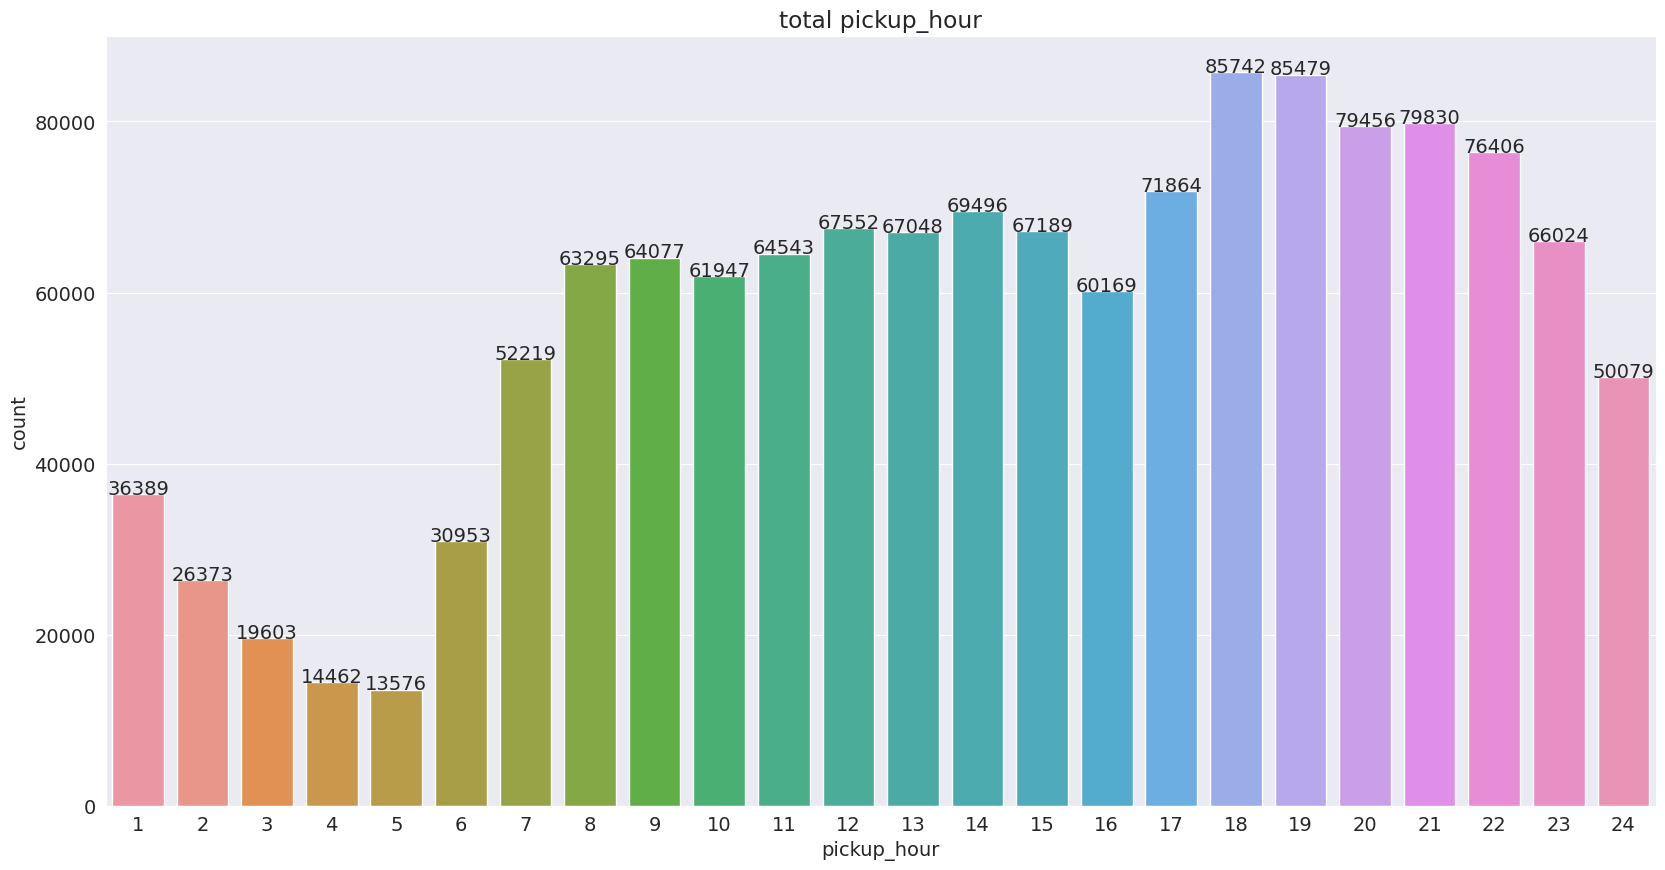

In [54]:
plt.figure(figsize = (20,10))
ax = sns.countplot(x = nyc_df['pickup_hour'] )
plt.title('total pickup_hour')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + (p.get_width()/2),
    y = height+0.2, ha = 'center', s = '{:.0f}'.format(height))
plt.show()

We see the busiest hours are 6:00 pm to 7:00 pm and that makes sense as this is the time when people return from their offices.

The most busy hours for taxi trip were between evening 18-22 hr
The least busy hours were between early morning 2-5 h

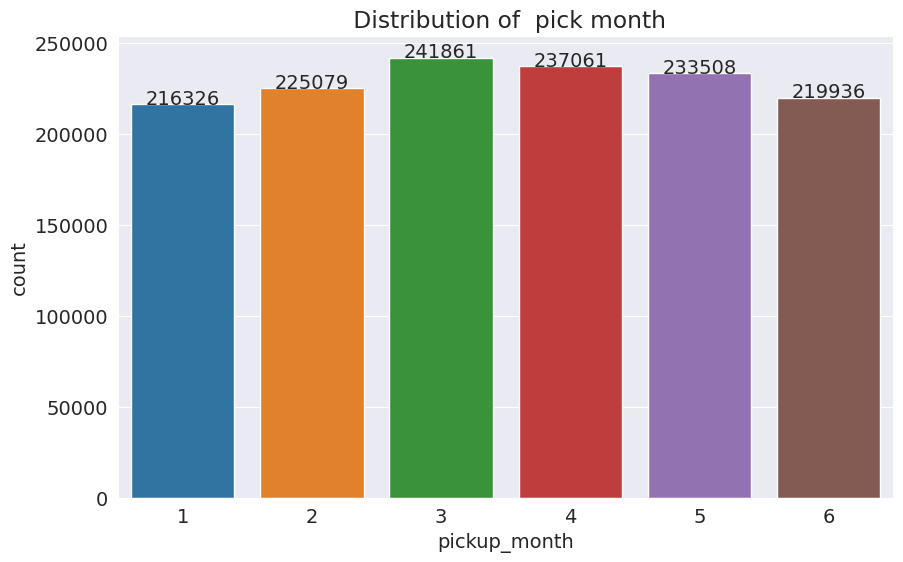

In [55]:
ax = sns.countplot(x = nyc_df['pickup_month'])
plt.title(' Distribution of  pick month')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + (p.get_width()/2),
    y = height+0.2, ha = 'center', s = '{:.0f}'.format(height))
plt.show()

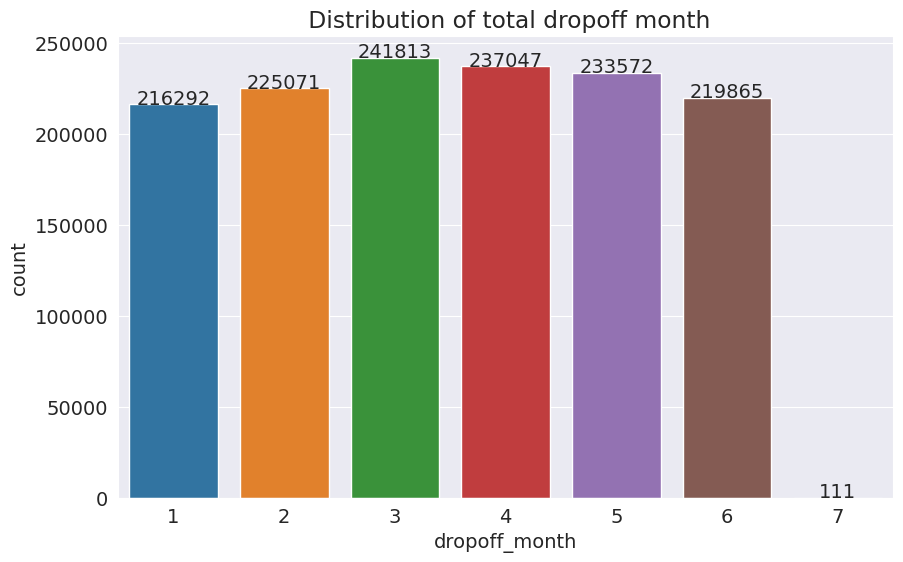

In [56]:
ax = sns.countplot(x = nyc_df['dropoff_month'])
plt.title(' Distribution of total dropoff month')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + (p.get_width()/2),
    y = height+0.2, ha = 'center', s = '{:.0f}'.format(height))
plt.show()

1.The month of March has received the highest number of trips followed by April for both pickup/dropoff.

2.The least number of trips done in the month of January and July.

## **Bivariate Data Analysis**

Passenger Count vs Vendor id

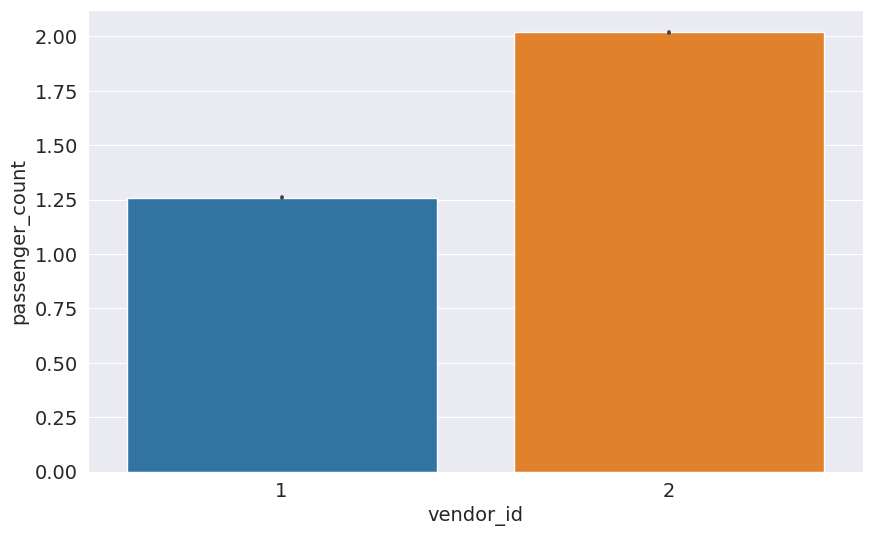

In [57]:
sns.barplot(y='passenger_count',x='vendor_id',data=nyc_df)
plt.show()

This shows that vendor 2 generally carries 2 passengers while vendor 1 carries 1 passenger rides.

**Trip Duration per time zone**

<Axes: xlabel='pickup_timezone', ylabel='trip_duration'>

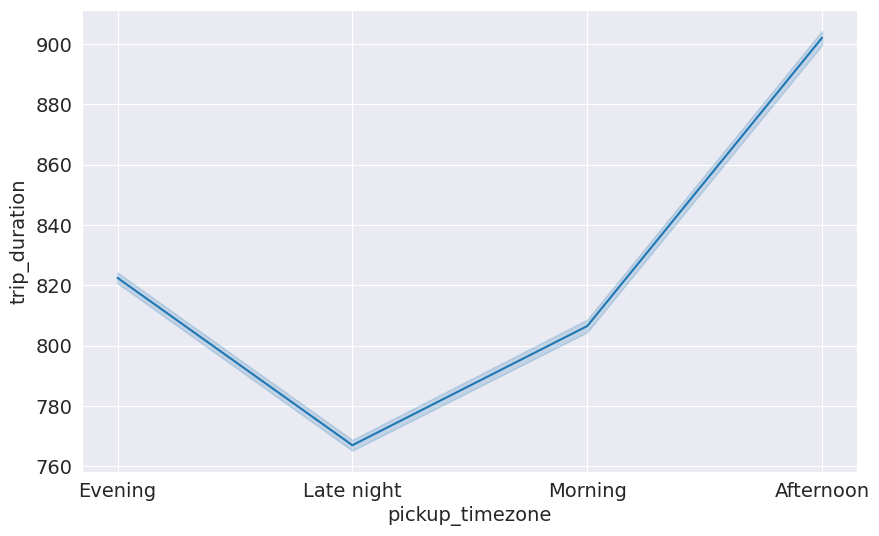

In [58]:
sns.lineplot(x='pickup_timezone',y='trip_duration',data=nyc_df)

From the above lineplot we can say that, trip duration is the maximum in the afternoon and lowest between late night and morning.

## **Trip Duration per different days**

<Axes: xlabel='pickup_day', ylabel='trip_duration'>

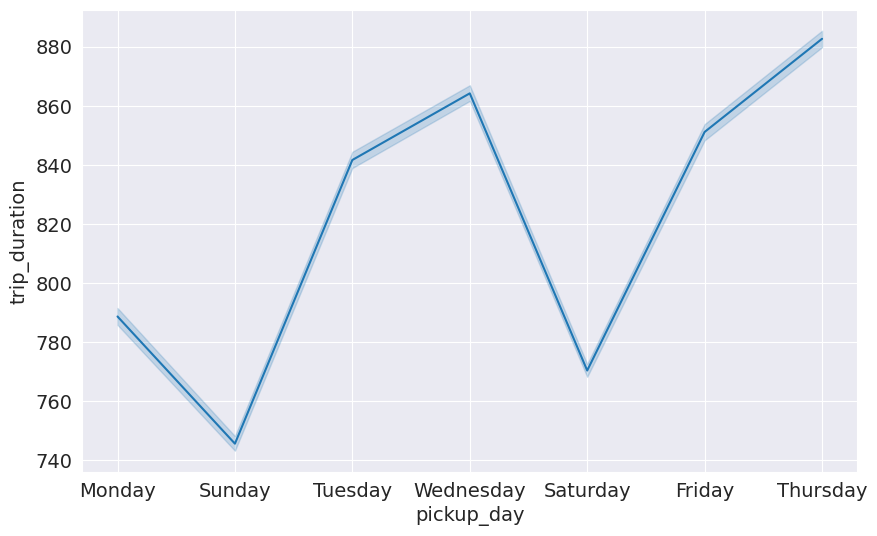

In [59]:
sns.lineplot(x='pickup_day',y='trip_duration',data=nyc_df)

From the above line plot we can say that,the trip duration is the maximum in Wednesday and lowest on Sunday

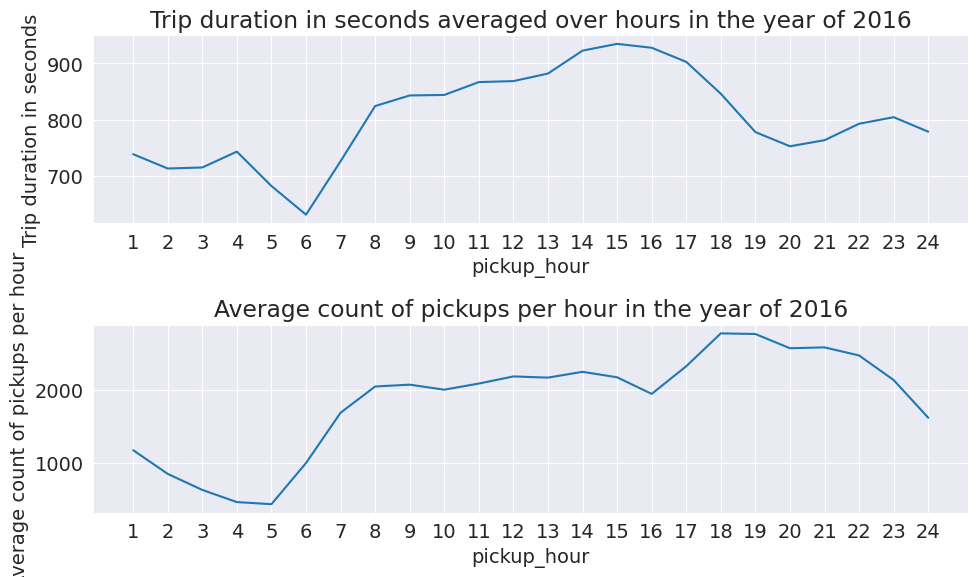

In [62]:
#Plotting average trip duration for each hour over the entire year
ax1 = plt.subplot(211)
nyc_df.groupby(nyc_df.pickup_hour)['trip_duration'].mean().plot(ax = ax1, figsize=(10,6))
plt.ylabel('Trip duration in seconds')
plt.xticks(nyc_df.pickup_hour.unique())
plt.title('Trip duration in seconds averaged over hours in the year of 2016')

# Plotting the average number of rides per hour
ax2 = plt.subplot(212)
nyc_df.groupby(['pickup_date', 'pickup_hour']).count()['vendor_id'].groupby('pickup_hour').mean().plot(ax = ax2, figsize=(10,6))
plt.ylabel('Average count of pickups per hour')
plt.xticks(nyc_df.pickup_hour.unique())
plt.title('Average count of pickups per hour in the year of 2016')
plt.tight_layout()

As one would expect the trip duration and the number of rides are higher in the evening time. As the number of rides go up in a certain area one can expect the resulting traffic to slow down the traffic increasing the trip duration time.

From the 2nd plot we can see how the pickup rides increase steadily from 5am to 8am only to flatten out between 8am to 4pm and then again steeply increase from 4pm to 6pm to fall down later.

The average trip duration is around 15 minutes during the evening time.

**Heatmap**

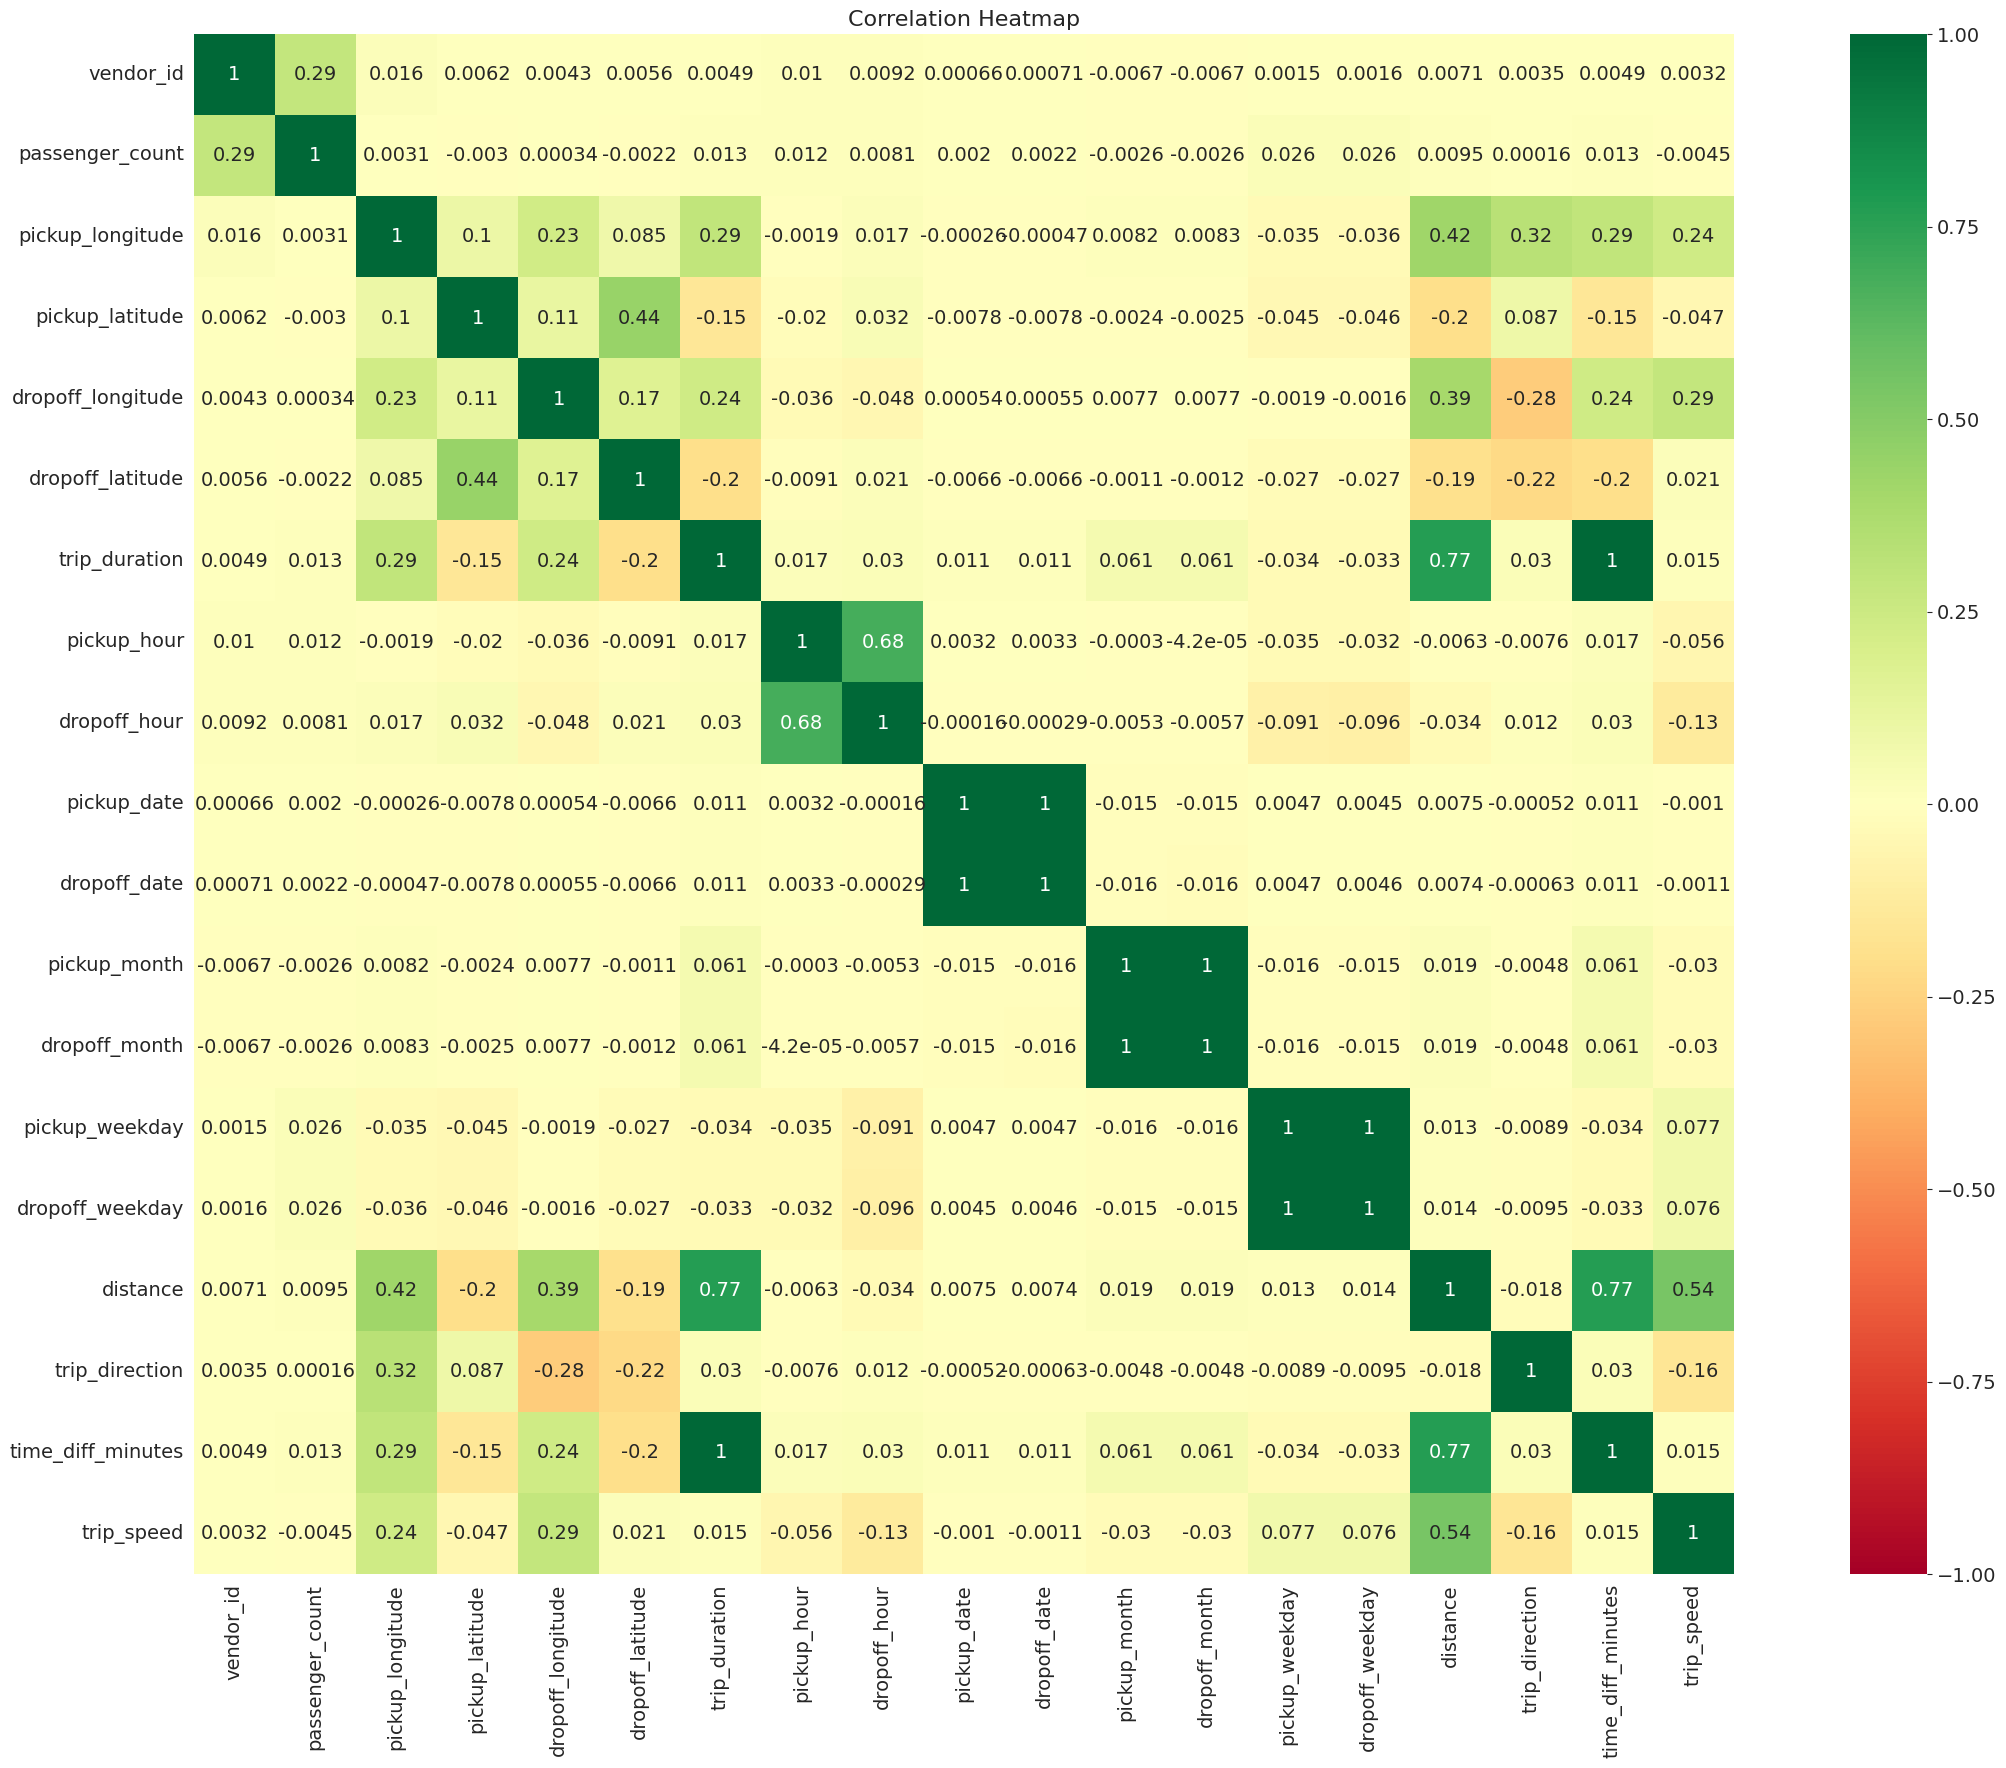

In [70]:
plt.figure (figsize= (30,20))

sns.heatmap(nyc_df.corr(), cmap='RdYlGn', annot=True,vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

We can see a high correlation between pickup_month and dropoff_month,pickup_date and dropoff_date,pickup_weekday and dropoff_weekday.

Our target variable shows 0.77 percent correalation with distance.

pickup_hour and dropoff hour shows a correaltion of 0.68.

we drop time_diff_minutes since its highly correalted with trip_duration.

In all highly correalted features we can only keep the pickup details and drop the dropoff details to remove multicollinearity.

In [67]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [69]:
calc_vif(nyc_df[[i for i in nyc_df.describe().columns if i  in [
 'passenger_count',
 'pickup_weekday',
 'pickup_hour',
 'pickup_month',
 'pickup_date','distance',
 'trip_direction']]])

,variables,VIF
0,passenger_count,2.437565
1,pickup_hour,4.834519
2,pickup_date,3.557373
3,pickup_month,4.244865
4,pickup_weekday,3.021079
5,distance,1.854131
6,trip_direction,2.847066


**Feature Engineering**

## **Multivariate Normality Distribution check and Handling Skewness**

Text(0.5, 0, 'Trip Duration')

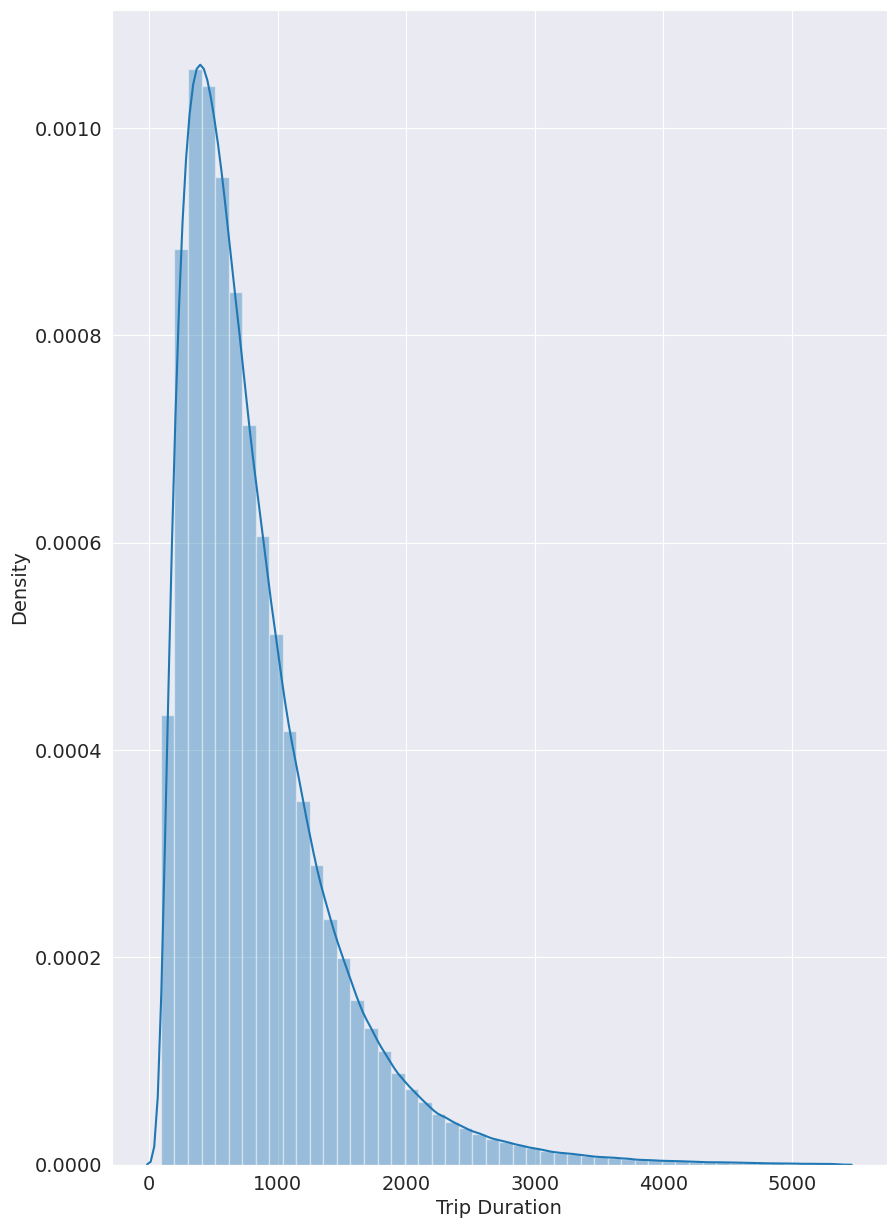

In [72]:
# Trip_Duration (Target Variable)
plt.figure(figsize=(10,15))
sns.distplot(nyc_df['trip_duration'])
plt.xlabel('Trip Duration')

Text(0.5, 0, 'trip_duration')

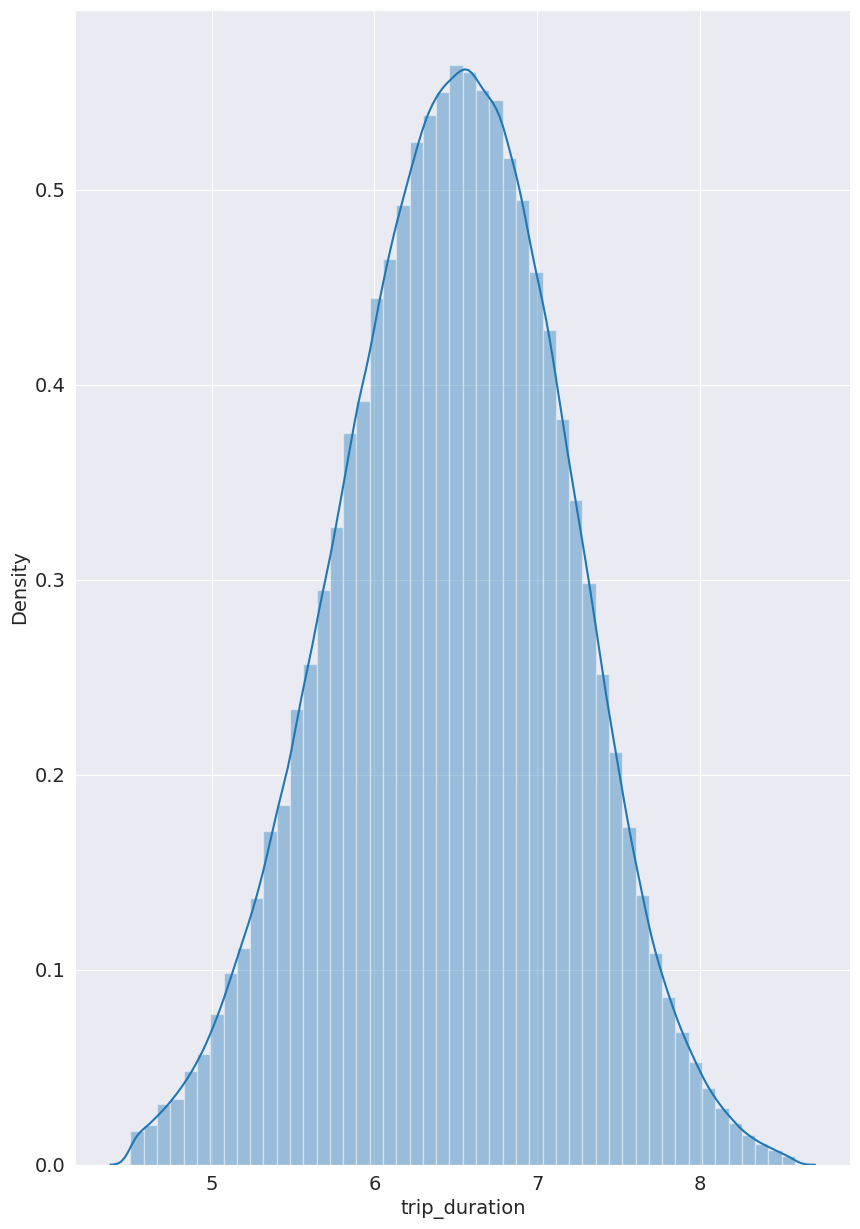

In [73]:
#Using log transform to bring it to normal distribution
plt.figure(figsize=(10,15))
sns.distplot(np.log(nyc_df['trip_duration']))
plt.xlabel('trip_duration')

In [75]:
numeric_variables=nyc_df.describe().columns

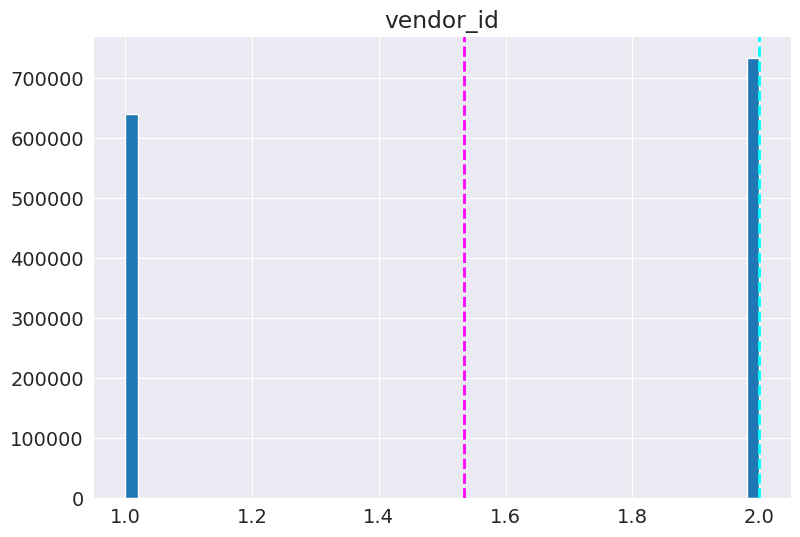

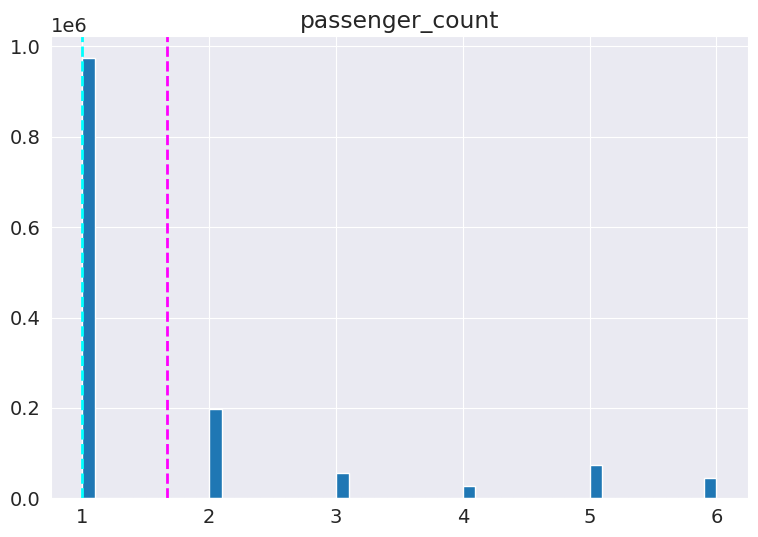

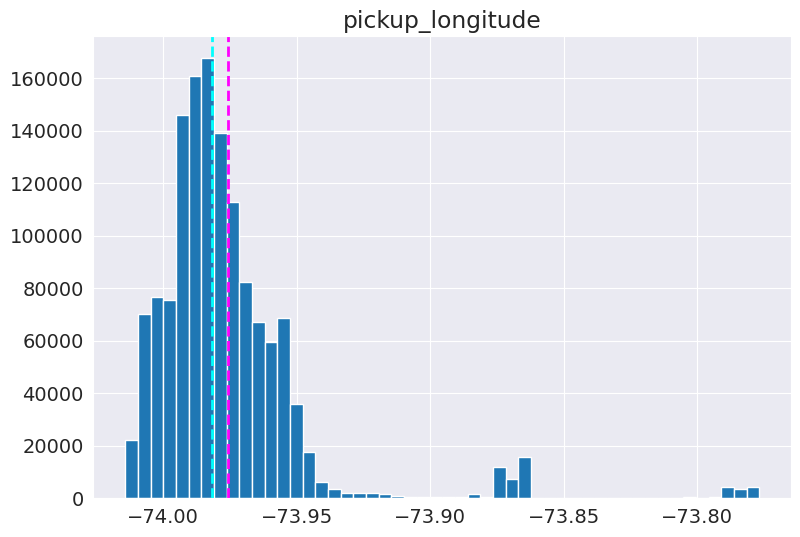

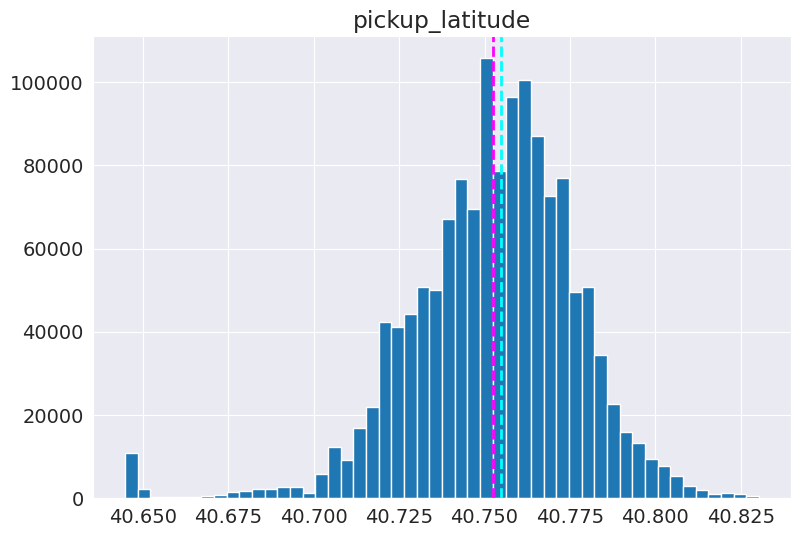

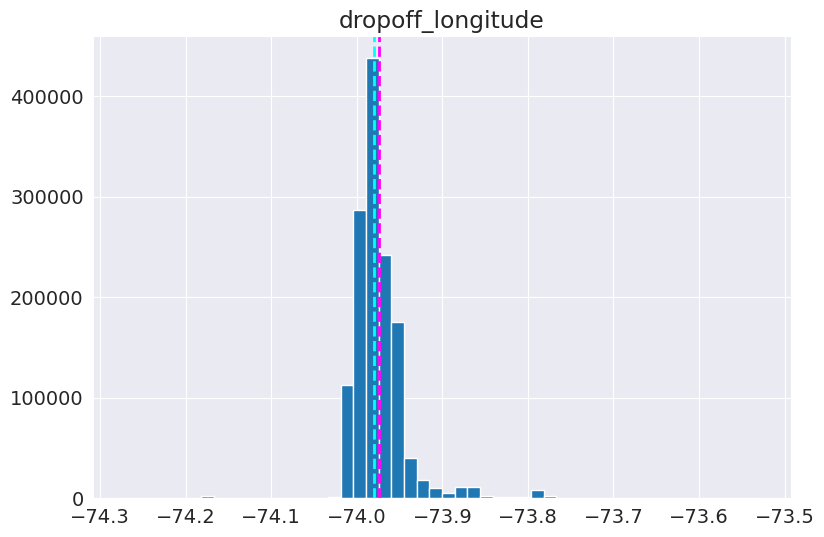

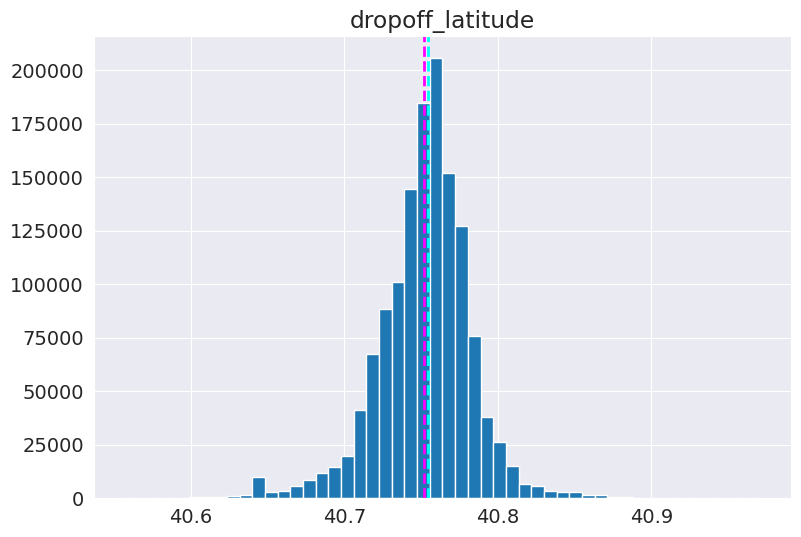

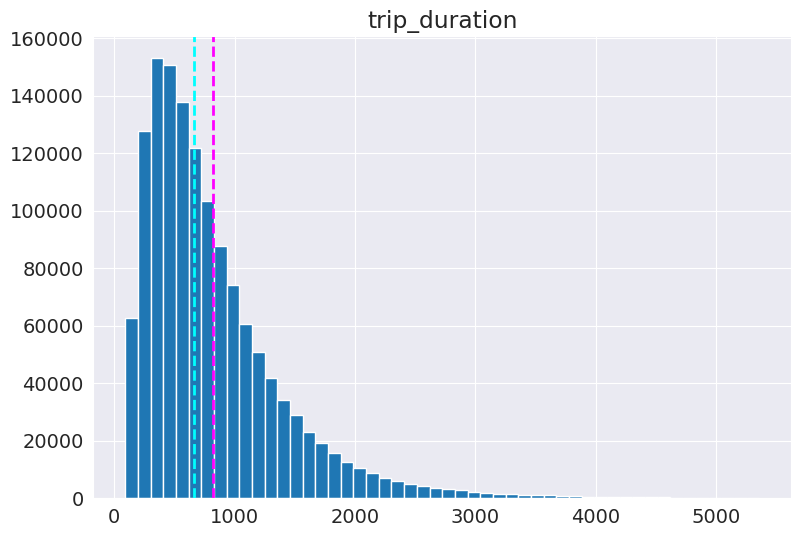

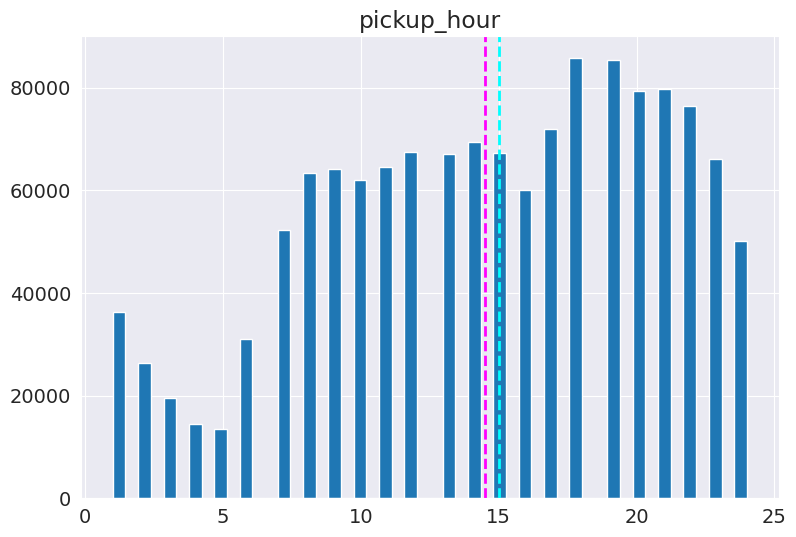

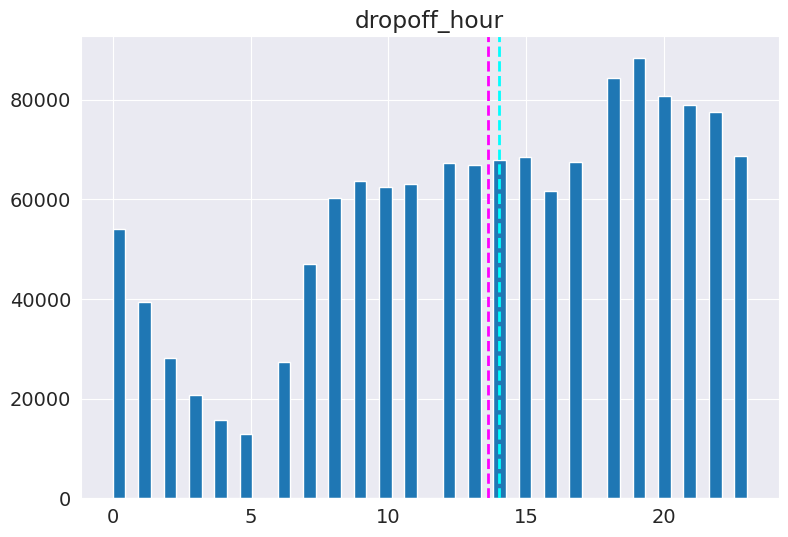

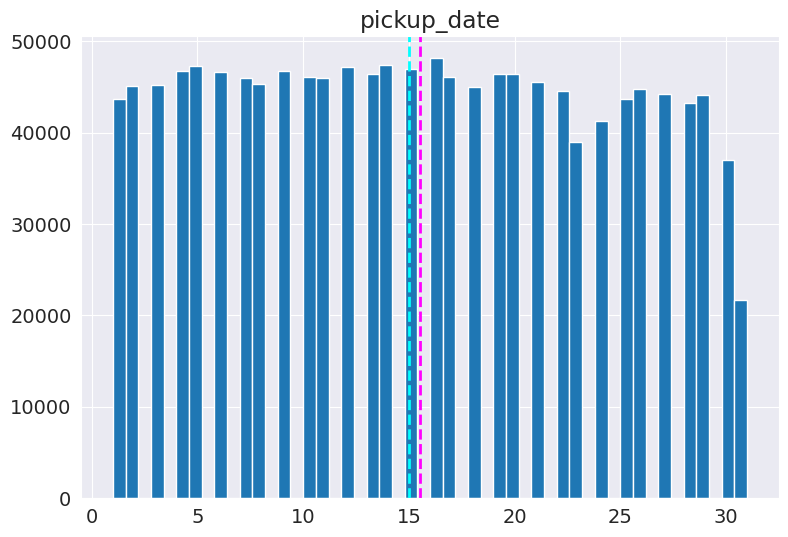

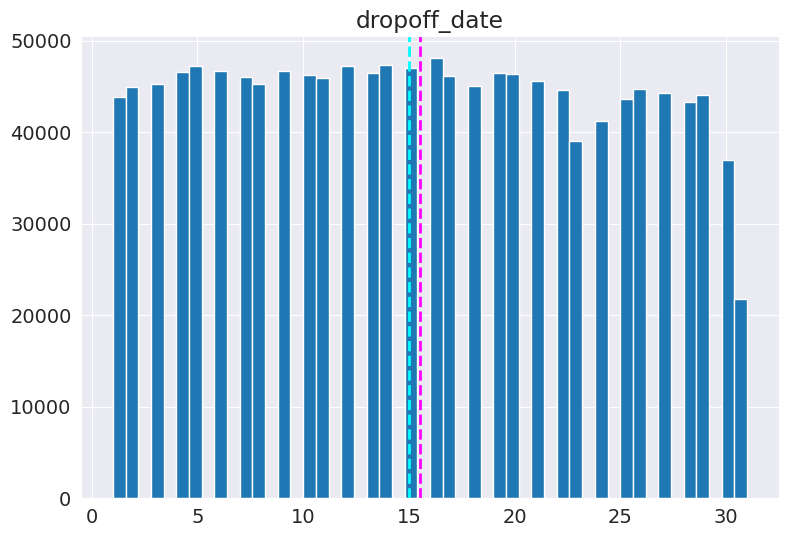

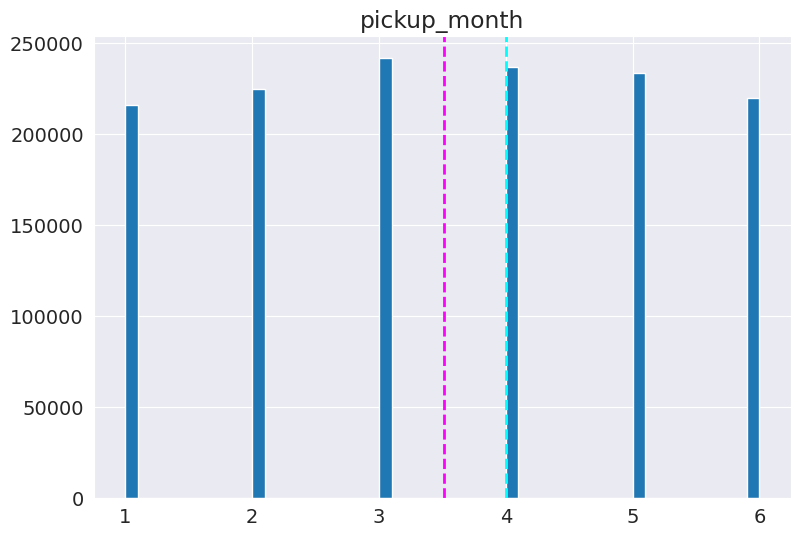

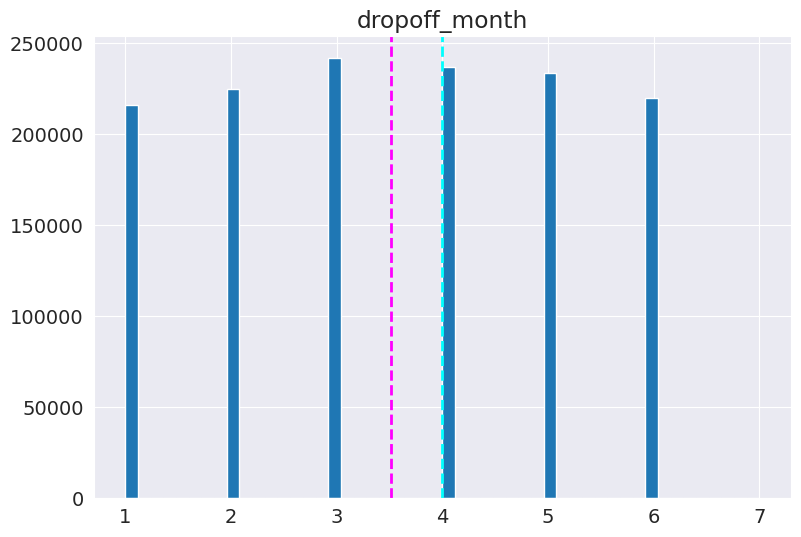

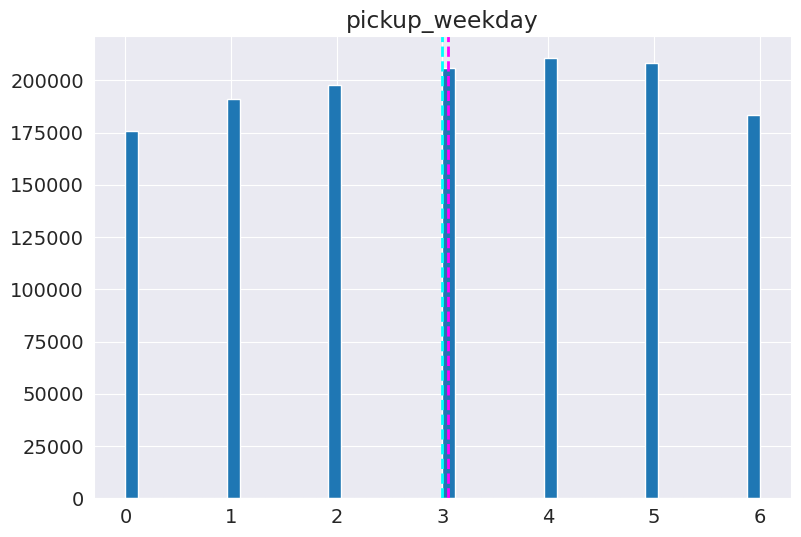

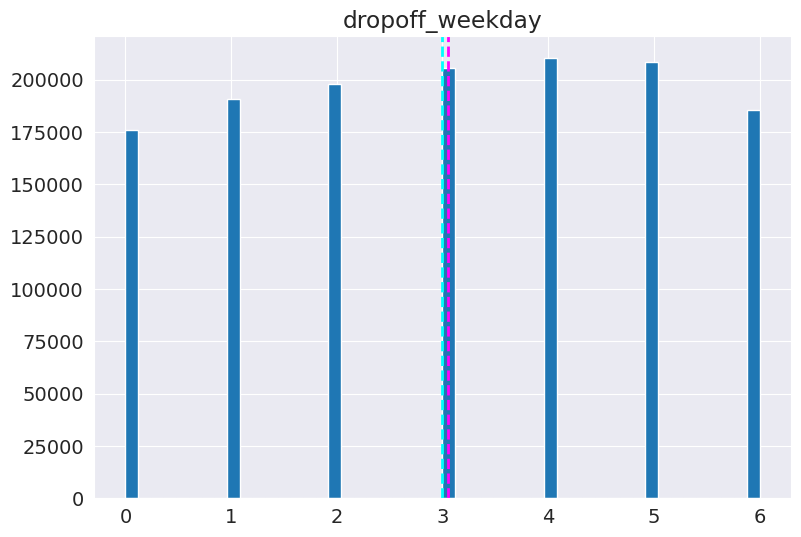

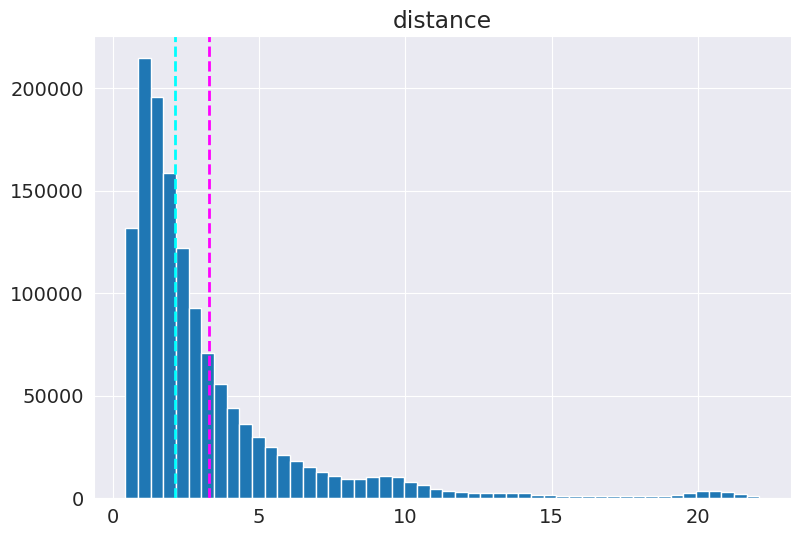

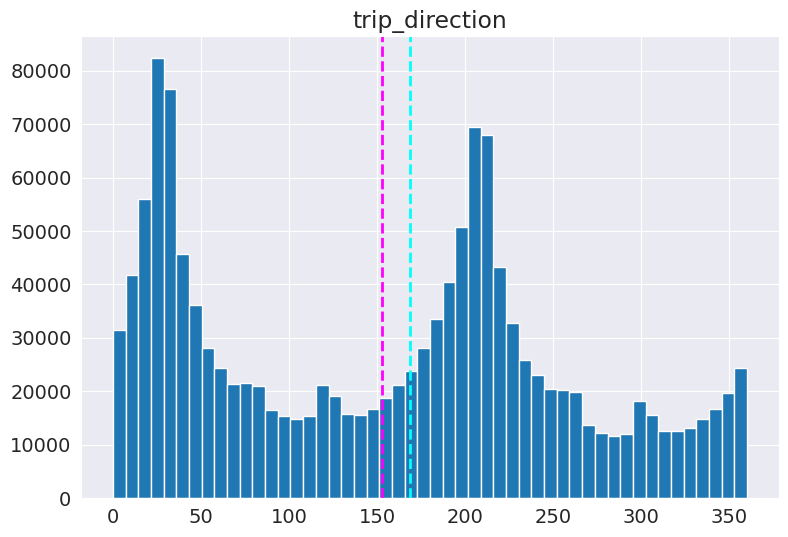

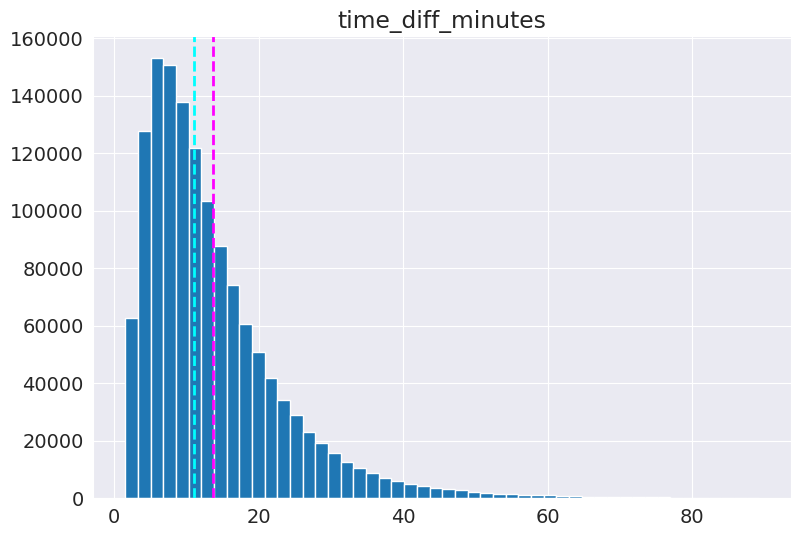

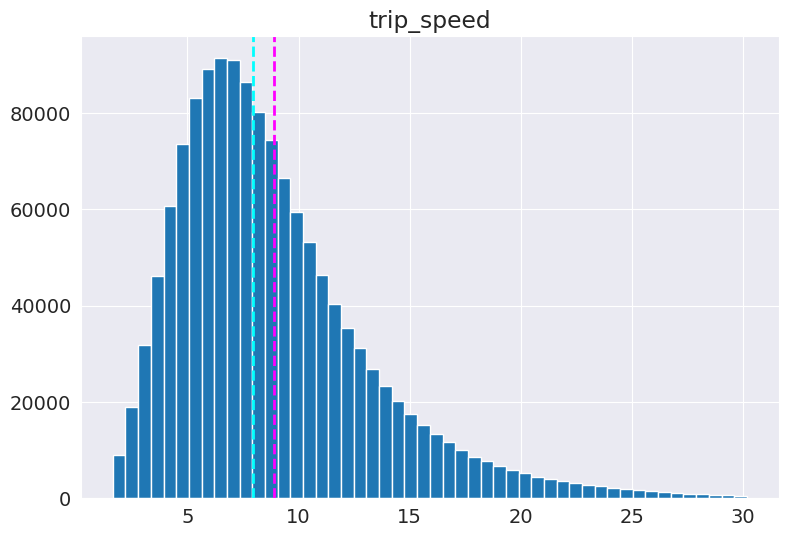

In [76]:
# plot a hist plot for each numerical features

for col in numeric_variables:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  feature = nyc_df[col]
  feature.hist(bins=50, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

Treating the skewness in the distance feature using log transform.

trip_speed,time_diff_minutes features are highly in correaltion with our target variable and it may result in data leakage and getting high accuracy near to 100 percentage hence we will not handle the skewness in these features and directly drop these features before model buliding

Text(0.5, 0, 'distance')

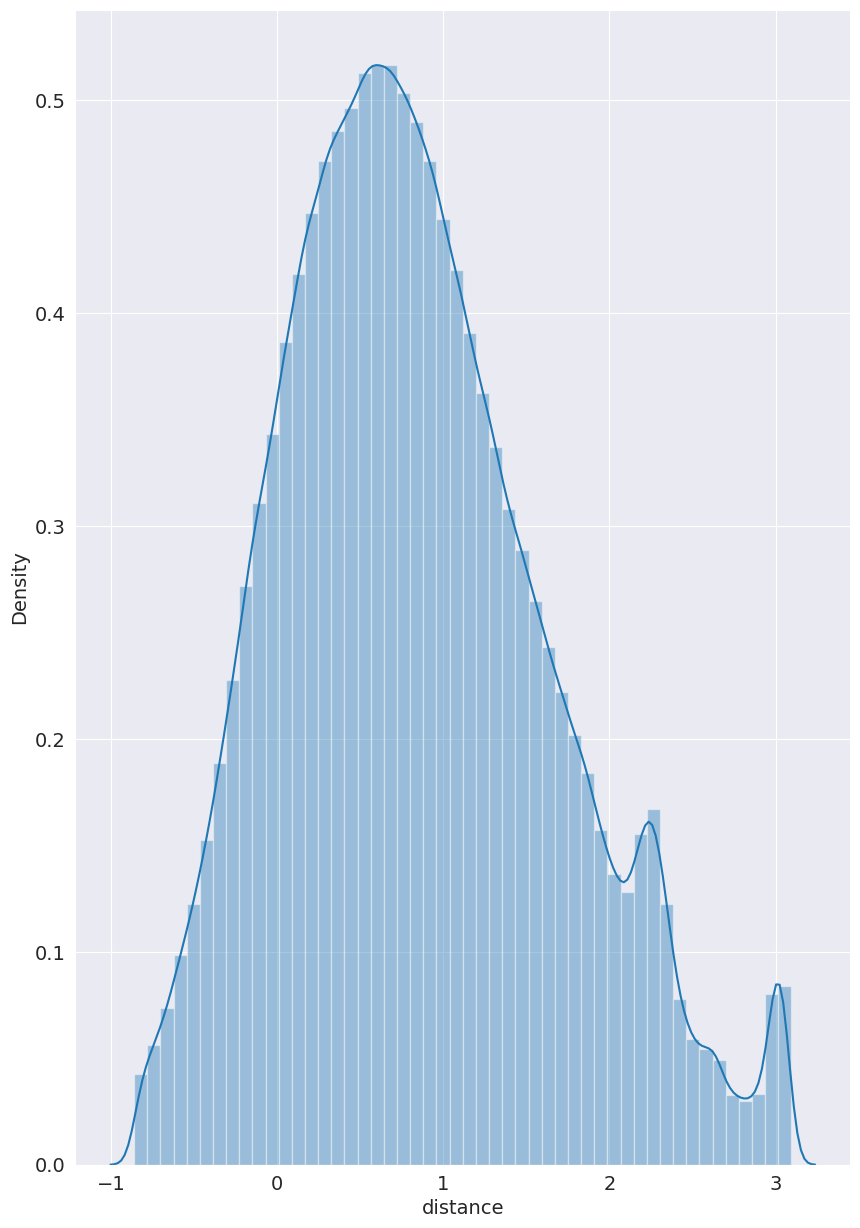

In [77]:
plt.figure(figsize=(10,15))
sns.distplot(np.log(nyc_df['distance']))
plt.xlabel('distance')

In [ ]:
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['trip_duration']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('trip_duration')
    ax.set_title('trip_duration vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['trip_duration'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

From above plot we can conclude that only trip_distance and trip_speed were having a linear relationship with trip_duration

## **Encoding Categorical Features**

In [78]:
nyc_df_copy = nyc_df.copy()

In [79]:
nyc_df_copy.drop(labels=['dropoff_timezone','store_and_fwd_flag',],axis=1,inplace=True)

In [80]:
# One hot encoding on pickup_timezone feature
nyc_df_copy = pd.get_dummies(nyc_df_copy,columns=["pickup_timezone"],prefix=["pickup_timezone"])

In [81]:

nyc_df_copy.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,...,pickup_weekday,dropoff_weekday,distance,trip_direction,time_diff_minutes,trip_speed,pickup_timezone_Afternoon,pickup_timezone_Evening,pickup_timezone_Late night,pickup_timezone_Morning
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,...,0,0,1.498523,99.970196,7.583333,7.362705,0,1,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,...,6,6,1.805510,242.846232,11.050000,6.087959,0,0,1,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124,...,1,1,6.385108,200.319835,35.400000,6.720462,0,0,0,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,...,2,2,1.485501,187.262300,7.150000,7.741069,0,1,0,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,...,5,5,1.188590,179.473585,7.250000,6.108411,1,0,0,0


## Handling Skewness in numerical features using log Transform

In [82]:
nyc_df_copy['distance'] = nyc_df_copy['distance'].map(lambda x : np.log(x) if x != 0 else 0)

In [83]:

nyc_df_copy['pickup_month'] = nyc_df_copy['pickup_month'].map(lambda x : np.log(x) if x != 0 else 0)
nyc_df_copy['pickup_hour'] = nyc_df_copy['pickup_hour'].map(lambda x : np.log(x) if x != 0 else 0)
nyc_df_copy['passenger_count'] = nyc_df_copy['passenger_count'].map(lambda x : np.sqrt(x) if x != 0 else 0)

In [84]:
nyc_df_copy.shape


(1373771, 28)

## **Feature Selection**

We cannot use all the columns from the dataframe because some of them are datetime and some of them were calculated based on the target variable such as trip_speed_mph.

So, we will use only the following columns: cols_to_use = ['vendorid', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_month', 'pickup_weekday', 'pickup_hour', 'distance, 'trip_direction', 'trip_duration']

In [85]:
features = ['vendor_id',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'pickup_weekday',
 'pickup_hour',
 'pickup_month',
 'pickup_date','distance',
 'trip_direction']

In [86]:
features.extend(['pickup_timezone_Afternoon', 'pickup_timezone_Evening',
       'pickup_timezone_Late night', 'pickup_timezone_Morning'])

In [87]:
X = nyc_df_copy[features] #Independent features
y = np.log(nyc_df_copy['trip_duration'])  #Dependent features

In [89]:
X.shape, y.shape

((1373771, 16), (1373771,))

In [90]:
X = nyc_df_copy[features] #Independent features
y = np.log(nyc_df_copy['trip_duration'])  #Dependent features

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(1099016, 16)
(274755, 16)


In [94]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train[features]=sc.fit_transform(X_train[features])
X_test[features]=sc.transform(X_test[features])

In [95]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train[features]=sc.fit_transform(X_train[features])
X_test[features]=sc.transform(X_test[features])

**Buliding a base model using Linear Regression**

We have many variables such as the pickup/dropoff month, weekday, hour of the day, trip direction which are not linear variables and can be difficult for a linear regression (LR) algorithm to model without first converting these variables to appropriate forms that can be fed to the LR models and understood by it. And, we also need to scale the data to prevent the dominance of larger magnitude variables in LR models.

Another alternative is we can use non-linear methods such as decision trees to fit the data. Decision tree doesn’t require us to convert the variables because it can split across any values of the variables and also, we don’t need to scale the data when using trees because each variable is considered separately for calculating the gain at each branching.

But before moving onto decision trees or random forest let’s check the performance of LR using only few significant variables which have vif values below 5,hence there will be no multicollinearirty

We have to satisfy linear regression assumption inorder to use a linear regression model.

In [96]:
calc_vif(nyc_df[[i for i in nyc_df.describe().columns if i  in [
 'passenger_count',
 'pickup_weekday',
 'pickup_hour',
 'pickup_month',
 'pickup_date','distance',
 'trip_direction']]])

,variables,VIF
0,passenger_count,2.437565
1,pickup_hour,4.834519
2,pickup_date,3.557373
3,pickup_month,4.244865
4,pickup_weekday,3.021079
5,distance,1.854131
6,trip_direction,2.847066


In [99]:
features1= [
 'passenger_count',
 'pickup_weekday',
 'pickup_hour',
 'pickup_month',
 'pickup_date','distance','trip_direction'
 ]
features1

['passenger_count',
 'pickup_weekday',
 'pickup_hour',
 'pickup_month',
 'pickup_date',
 'distance',
 'trip_direction']

In [101]:
X1 = nyc_df_copy[features1] #Independent features
y1 = np.log(nyc_df_copy['trip_duration'])  #Dependent features

Linear Regression

In [102]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split( X1,y1 , test_size = 0.2, random_state = 0)
print(X1_train.shape)
print(X1_test.shape)

(1099016, 7)
(274755, 7)


In [103]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X1_train[features1]=sc.fit_transform(X_train[features1])
X1_test[features1]=sc.transform(X_test[features1])

In [104]:
reg = LinearRegression().fit(X1_train, y1_train)

In [105]:
reg.score(X1_train, y1_train)

0.6517632714503815

In [106]:
reg.coef_

array([ 0.00541435, -0.03090333,  0.04719984,  0.02261548,  0.00396016,
        0.55826879,  0.05857122])

In [107]:
reg.intercept_

6.479281679133733

In [108]:
# Predicting the Test set results using training data
y_pred_train = reg.predict(X1_train)

In [109]:
y_pred_train

array([8.11533007, 5.50623128, 6.04421903, ..., 6.8011347 , 6.02499813,
       7.17386907])

**Regression Evaluation Metrics**

In [110]:
# Predicting the Test set results using test data
y_pred_test = reg.predict(X1_test)

In [111]:
y_pred_test

array([7.0669944 , 6.36024378, 6.28134178, ..., 5.82126291, 6.48273482,
       6.91318195])

In [149]:
# Test performance using Evaluation metrics
MSE  = round(mean_squared_error((y_test), (y_pred_test)),2)
print("MSE :" , MSE)

MAE= round(mean_absolute_error((y_test), (y_pred_test)),2)
print("MAE :" ,MAE)

RMSE = round(np.sqrt(MSE) ,2)
print("RMSE :" ,RMSE)

r2 = round(r2_score((y_test), (y_pred_test)),2)
print("R2 :" ,r2)
print("Adjusted R2 : ",round(1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),2))

MSE : 0.17
MAE : 0.32
RMSE : 0.41
R2 : 0.65
Adjusted R2 :  0.65



## **Plotting a Scatter plot on Actual vs Predicted trip duration Values**

Text(0, 0.5, 'Predicted trip duration')

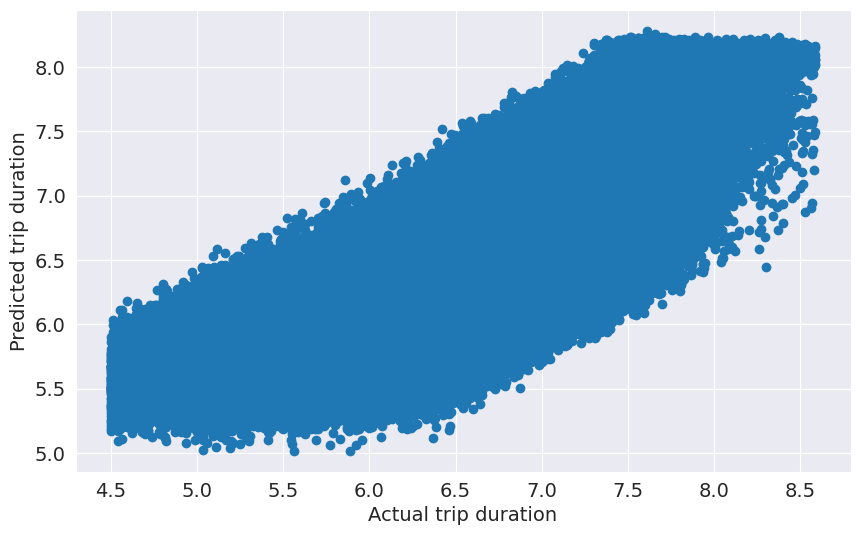

In [113]:
plt.scatter((y_test), (y_pred_test))
plt.xlabel('Actual trip duration')
plt.ylabel('Predicted trip duration')

Text(0, 0.5, 'residuals')

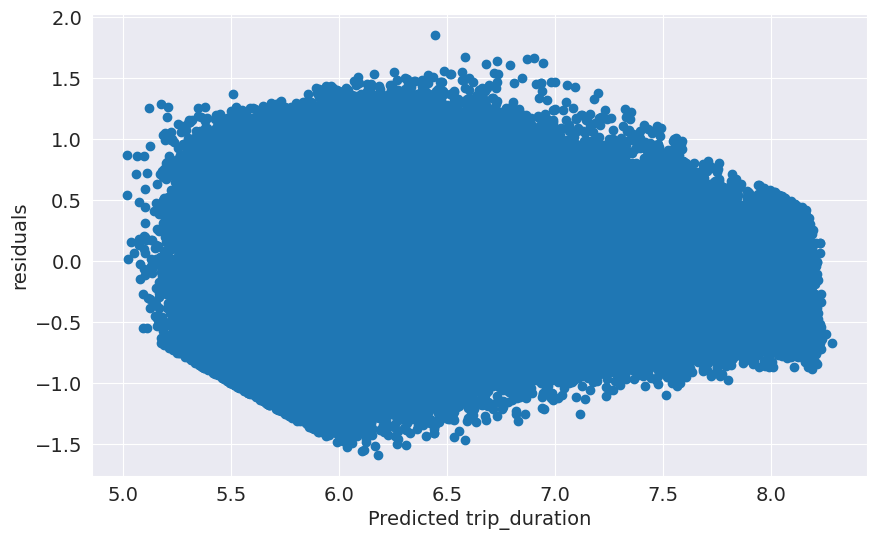

In [115]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.xlabel('Predicted trip_duration')
plt.ylabel('residuals')

## **Random Forest**

In [116]:
#importing reqd libraries
from sklearn.ensemble import RandomForestRegressor

In [117]:
rf= RandomForestRegressor()

In [118]:
#Setting various parameter for hyperparameter tuning
param_dict_rf = {
    'max_depth': [4, 6, 7],
 'n_estimators': [80, 90]
  }

In [119]:
rf_random = RandomizedSearchCV(estimator=rf,
                       param_distributions = param_dict_rf,
                       cv = 3, verbose=2)

In [120]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END .......................max_depth=4, n_estimators=80; total time= 3.9min
[CV] END .......................max_depth=4, n_estimators=80; total time= 3.8min
[CV] END .......................max_depth=4, n_estimators=80; total time= 3.8min
[CV] END .......................max_depth=4, n_estimators=90; total time= 4.2min
[CV] END .......................max_depth=4, n_estimators=90; total time= 4.2min
[CV] END .......................max_depth=4, n_estimators=90; total time= 4.2min
[CV] END .......................max_depth=6, n_estimators=80; total time= 6.0min
[CV] END .......................max_depth=6, n_estimators=80; total time= 5.5min
[CV] END .......................max_depth=6, n_estimators=80; total time= 5.5min
[CV] END .......................max_depth=6, n_estimators=90; total time= 6.1min
[CV] END .......................max_depth=6, n_estimators=90; total time= 6.2min
[CV] END .......................max_depth=6, n_es

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [4, 6, 7],
                                        'n_estimators': [80, 90]},
                   verbose=2)

In [121]:
# print the best parameters after cross validation
print(rf_random.best_params_)

{'n_estimators': 90, 'max_depth': 7}


In [122]:
print('Train  neg_mean_squared_error score : ', rf_random.best_estimator_.score(X_train,y_train))
print('Test neg_mean_squared_error score: ', rf_random.best_estimator_.score(X_test,y_test))

Train  neg_mean_squared_error score :  0.718092765496342
Test neg_mean_squared_error score:  0.7192202646411101


In [123]:
y_pred_rf = rf_random.predict(X_test)


In [147]:
#Evaluating the model using regression metrics
MSE  = round(mean_squared_error((y_test), (y_pred_rf)), 2)
print("MSE :" , MSE)

MAE=round(mean_absolute_error((y_test), (y_pred_rf)),2)
print("MAE :" ,MAE)

RMSE = round(np.sqrt(MSE),2)
print("RMSE :" ,RMSE)

r2 = round(r2_score((y_test), (y_pred_rf)),2)
print("R2 :" ,r2)
print("Adjusted R2 : ",round(1-(1-r2_score((y_test), (y_pred_rf)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),2))

MSE : 0.13
MAE : 0.29
RMSE : 0.36
R2 : 0.72
Adjusted R2 :  0.72


Text(0, 0.5, 'Predicted trip duration')

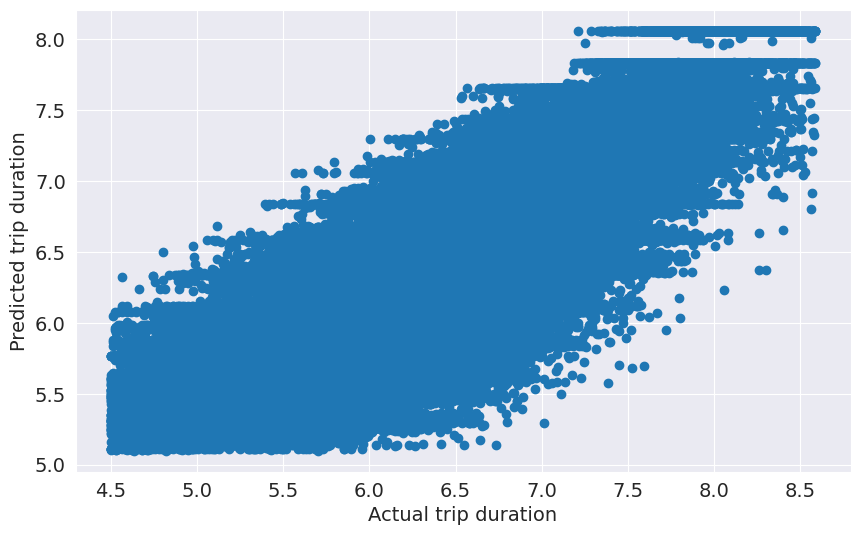

In [126]:
#Scatter plot vs Actual & Predicted trip duration Values
plt.scatter((y_test), (y_pred_rf))
plt.xlabel('Actual trip duration')
plt.ylabel('Predicted trip duration')

Text(0, 0.5, 'residuals')

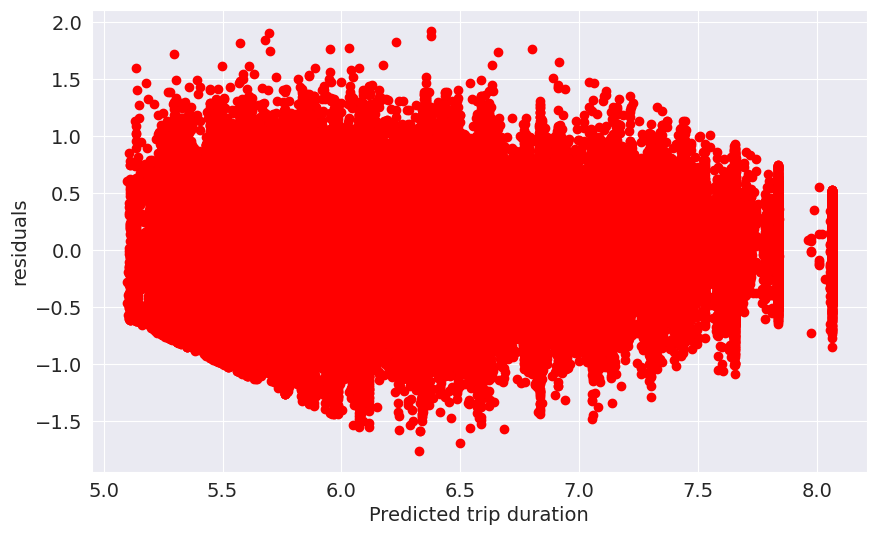

In [127]:
### Heteroscadacity
plt.scatter((y_pred_rf),(y_test)-(y_pred_rf),c='r')
plt.xlabel('Predicted trip duration')
plt.ylabel('residuals')

In [139]:
X1_train

,passenger_count,pickup_weekday,pickup_hour,pickup_month,pickup_date,distance,trip_direction
12205,-0.545795,0.486078,0.555530,0.847319,-0.286998,2.706004,1.691970
11935,-0.545795,-1.050356,-0.672424,-0.013062,-0.057228,-1.616858,-1.155056
1000438,-0.545795,1.510368,-0.334528,1.154402,1.206509,-0.718000,0.005283
138929,-0.545795,0.486078,-0.058447,0.847319,1.321394,-0.998252,0.683337
409312,0.466781,-0.538211,0.715072,-0.695984,-1.435850,-0.261085,0.621594
...,...,...,...,...,...,...,...
381929,-0.545795,-1.562500,0.555530,1.154402,0.517198,-0.523901,-1.418346
161681,0.466781,0.486078,-0.672424,0.847319,-1.091195,0.856804,0.516997
1022855,-0.545795,-0.026066,0.555530,0.471479,1.436279,0.653989,-1.428525
125266,-0.545795,-1.562500,0.555530,0.471479,-1.320965,-0.930258,-0.203741


## **XG Boost**

In [128]:
#importing reqd libraries
import xgboost as xg

In [129]:
xgb = xg.XGBRegressor()

In [130]:
#Setting various parameter for hyperparameter tuning
param_dict_xgb = {
    'max_depth': [4, 6, 7],
 'n_estimators': [60, 80]
  }

In [131]:
xgb_random = RandomizedSearchCV(estimator=xgb,
                       param_distributions = param_dict_xgb,
                       cv = 5, verbose=2)

xgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .......................max_depth=4, n_estimators=60; total time=   6.8s
[CV] END .......................max_depth=4, n_estimators=60; total time=   5.0s
[CV] END .......................max_depth=4, n_estimators=60; total time=   7.6s
[CV] END .......................max_depth=4, n_estimators=60; total time=   4.9s
[CV] END .......................max_depth=4, n_estimators=60; total time=   7.6s
[CV] END .......................max_depth=4, n_estimators=80; total time=   5.9s
[CV] END .......................max_depth=4, n_estimators=80; total time=   8.4s
[CV] END .......................max_depth=4, n_estimators=80; total time=   5.8s
[CV] END .......................max_depth=4, n_estimators=80; total time=   8.5s
[CV] END .......................max_depth=4, n_estimators=80; total time=   5.8s
[CV] END .......................max_depth=6, n_estimators=60; total time=   8.5s
[CV] END .......................max_depth=6, n_es

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   param_distributions={'max_depth': [4, 6, 7],
                                        'n_estimators': [60, 80]},
                   verbose=2)

In [132]:
# print the best parameters after cross validation
xgb_random.best_params_

{'n_estimators': 80, 'max_depth': 7}

In [133]:
print('Train neg_mean_squared_error score score : ', xgb_random.best_estimator_.score(X_train,y_train))
print('Test neg_mean_squared_error score score : ', xgb_random.best_estimator_.score(X_test,y_test))

Train neg_mean_squared_error score score :  0.8347418169097335
Test neg_mean_squared_error score score :  0.8298646287042217


In [134]:
y_pred_xg = xgb_random.predict(X_test)

In [148]:
#Evaluating the model using regression metrics
MSE  = round(mean_squared_error((y_test), (y_pred_xg)),2)
print("MSE :" , MSE)

MAE=round(mean_absolute_error((y_test), (y_pred_xg)),2)
print("MAE :" ,MAE)

RMSE = round(np.sqrt(MSE),2)
print("RMSE :" ,RMSE)

r2 = round(r2_score((y_test), (y_pred_xg)),2)
print("R2 :" ,r2)
print("Adjusted R2 : ",round(1-(1-r2_score((y_test), (y_pred_xg)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),2))

MSE : 0.08
MAE : 0.22
RMSE : 0.28
R2 : 0.83
Adjusted R2 :  0.83


Text(0, 0.5, 'Predicted trip duration')

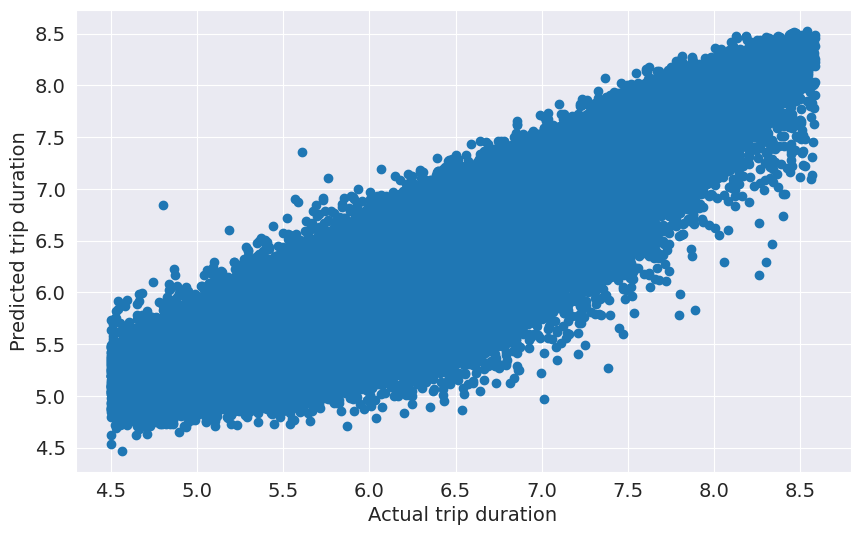

In [136]:
#Scatter plot vs Actual & Predicted trip duration Values
plt.scatter((y_test), (y_pred_xg))
plt.xlabel('Actual trip duration')
plt.ylabel('Predicted trip duration')

Text(0, 0.5, 'residuals')

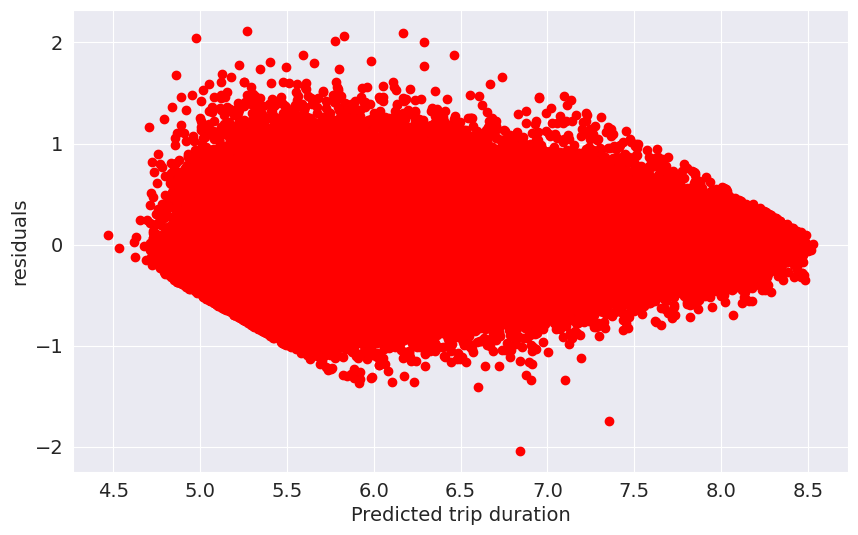

In [137]:
### Heteroscadacity
plt.scatter((y_pred_xg),(y_test)-(y_pred_xg),c='r')
plt.xlabel('Predicted trip duration')
plt.ylabel('residuals')

In [140]:
X1_train.columns

Index(['passenger_count', 'pickup_weekday', 'pickup_hour', 'pickup_month',
       'pickup_date', 'distance', 'trip_direction'],
      dtype='object')

In [151]:


from prettytable import PrettyTable

test = PrettyTable(['SL NO', 'MODEL_NAME', 'Test MSE', 'Test MAE', 'Test RMSE', 'Test R^2', 'Test Adjusted R^2'])
test.add_row(['1', 'Linear Regression', '0.17', '0.32', '0.41', '0.65', '0.65'])
test.add_row(['2', 'Random Forest Regressor', '0.13', '0.29', '0.36', '0.72', '0.72'])
test.add_row(['3', 'XGBRegressor', '0.08', '0.22', '0.28', '0.83', '0.83'])

print(test)


+-------+-------------------------+----------+----------+-----------+----------+-------------------+
| SL NO |        MODEL_NAME       | Test MSE | Test MAE | Test RMSE | Test R^2 | Test Adjusted R^2 |
+-------+-------------------------+----------+----------+-----------+----------+-------------------+
|   1   |    Linear Regression    |   0.17   |   0.32   |    0.41   |   0.65   |        0.65       |
|   2   | Random Forest Regressor |   0.13   |   0.29   |    0.36   |   0.72   |        0.72       |
|   3   |       XGBRegressor      |   0.08   |   0.22   |    0.28   |   0.83   |        0.83       |
+-------+-------------------------+----------+----------+-----------+----------+-------------------+


# **Conclusion**

1.Our base model (Linear Regression) gave us a r2_score of 0.65 in  test data and keep this model accuracy in reference to compare other model.

2.We got the best model accuracy in Xgboost model,r2 score of  0.83 in test data..The RMSE score of Xgboost model is 0.28

3.Our second best model is RandomForest Regressor with a r2 score of 0.72  in test data. The RMSE score of random forest is 0.36






